Content

    1. Import data set
    2. PII check
    3. Customer behavior in regions
    4. Create exclusion flag for low-activity customers and export
    5. Create customers’ profiles
    6. Create visualization of distribution of profile
    7. Aggregate max, mean, min of profile
    8. Compare customers’ profile with regions and departments
        ### Age Profile
        ### Income Profile
        ### Dependant Profile
        ### Baby Profile
        ### Pet Profile
    9. Exporting visualization



# 1. Import data set

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/brianyoo/Instacart Basket Analysis'

In [3]:
ords_prods_customers_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [4]:
pd.options.display.max_columns = None

# 2. PII Check

In [5]:
ords_prods_customers_merged.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'dependant_family', 'income', 'Unnamed: 0_x',
       'product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id', 'order_number',
       'order_date_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'new_customer', 'add_to_cart_order', 'reordered', '_merge',
       'busiest day', 'busiest days', 'time_periods_orders',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_order',
       'High_Low', 'median_order', 'customer_frequency'],
      dtype='object')

In [6]:
# Becauase the columns 'first_name' and 'last_name' have PII data, so theses were removed.

In [7]:
df = ords_prods_customers_merged.drop(columns = ['first_name', 'last_name'])

In [8]:
df.columns

Index(['user_id', 'gender', 'state', 'age', 'date_joined', 'dependant_family',
       'income', 'Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'order_number', 'order_date_of_week', 'order_hour_of_day',
       'days_since_prior_order', 'new_customer', 'add_to_cart_order',
       'reordered', '_merge', 'busiest day', 'busiest days',
       'time_periods_orders', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_order', 'High_Low', 'median_order',
       'customer_frequency'],
      dtype='object')

# 3. Customer's consumption behavior in regions

In [9]:
Northeast = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania'
        ,'New Jersey']

In [10]:
Midwest = ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas'
         ,'Minnesota','Iowa','Missouri']

In [11]:
South = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina'
       ,'Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [12]:
West = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon',
      'California','Hawaii']

In [13]:
result_1 = []
for state in df['state'] : 
        if state in Northeast : 
            result_1.append('Northeast')
        elif state in Midwest : 
            result_1.append('Midwest')
        elif state in South : 
            result_1.append('South')
        else : 
            result_1.append('West')

In [14]:
df['region'] = result_1

In [15]:
df['region'].value_counts()

South        10198982
West          7831810
Midwest       7176924
Northeast     5422025
Name: region, dtype: int64

In [16]:
df.head()

,user_id,gender,state,age,date_joined,dependant_family,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,order_number,order_date_of_week,order_hour_of_day,days_since_prior_order,new_customer,add_to_cart_order,reordered,_merge,busiest day,busiest days,time_periods_orders,busiest_period_of_day,max_order,loyalty_flag,mean_order,High_Low,median_order,customer_frequency,region
0,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443895,443895,2543867,5,1,9,30.0,False,2,0,both,Regularly day,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Non-frequent customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443897,443897,1285508,7,5,15,11.0,False,1,1,both,Regularly day,Regularly days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443898,443898,2578584,8,1,15,10.0,False,2,1,both,Regularly day,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Frequent customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,165665,6184,6184,Clementines,32,4,4.3,443891,443891,518967,1,2,9,NaN,True,1,0,both,Regularly day,Regularly days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,NaN,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,165665,6184,6184,Clementines,32,4,4.3,443893,443893,2524893,3,3,11,30.0,False,2,1,both,Regularly day,Slowest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Non-frequent customer,Midwest


In [17]:
df.groupby('region')['days_since_prior_order'].mean()

region
Midwest      11.188121
Northeast    11.074020
South        11.116169
West         11.057400
Name: days_since_prior_order, dtype: float64

In [18]:
# each region's spending habits are approximately similar

# 4. Create exclusion flag for low-activity customers and export

In [19]:
df.loc[df['max_order'] < 5, 'activity'] = 'low'

In [20]:
df.loc[df['max_order'] >= 5, 'activity'] = 'high'

In [21]:
df['activity'].value_counts()

high    29270938
low      1358803
Name: activity, dtype: int64

In [22]:
df_low_activity = df[df['activity'] == 'low']

In [23]:
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_low_activity.pkl'))

In [24]:
df.drop(df[df['activity']=='low'].index, inplace = True)

In [25]:
df['activity'].value_counts()

high    29270938
Name: activity, dtype: int64

# 5. Create customers’ profiles

In [26]:
df_high_activity = df[df['activity'] == 'high']

In [27]:
# age profile flag. young : 0-30, middle : 31-45, old : 46 and above

In [28]:
df_high_activity.loc[df_high_activity['age'] <= 30, 'age_profile'] = 'young'
df_high_activity.loc[(df_high_activity['age'] > 30) & (df_high_activity['age'] <= 45), 'age_profile'] = 'middle'
df_high_activity.loc[df_high_activity['age'] >45, 'age_profile'] = 'old'

In [29]:
df_high_activity['age_profile'].value_counts()

old       16457321
middle     6860171
young      5953446
Name: age_profile, dtype: int64

In [30]:
# income profile flag. low : 0-55000, middle : 55001-155000, high : 155001 and above

In [31]:
df_high_activity.loc[df_high_activity['income'] <= 55000, 'income_profile'] = 'low'
df_high_activity.loc[(df_high_activity['income'] > 55000) & (df_high_activity['income'] <= 155000), 'income_profile'] = 'middle'
df_high_activity.loc[df_high_activity['income'] >155000, 'income_profile'] = 'high'

In [32]:
df_high_activity['income_profile'].value_counts()

middle    22231391
low        4191164
high       2848383
Name: income_profile, dtype: int64

In [33]:
# dependency profile flag. no dependant : 0, has dependant : 1 or above

In [34]:
df_high_activity.loc[df_high_activity['dependant_family'] > 0, 'dependant_profile'] = 'has dependant'
df_high_activity.loc[df_high_activity['dependant_family'] <= 0, 'dependant_profile'] = 'no dependant'

In [35]:
df_high_activity['dependant_profile'].value_counts()

has dependant    21958418
no dependant      7312520
Name: dependant_profile, dtype: int64

In [36]:
# adding department data set

In [37]:
df_departments=pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [38]:
df_departments.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [39]:
df_departments.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [40]:
df_departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [41]:
# merging two different data sets

In [42]:
df_merged = df_high_activity.merge(df_departments, on = 'department_id')

In [43]:
df_merged['department'].value_counts()

produce            8586351
dairy eggs         4892140
snacks             2616075
beverages          2430657
frozen             2006425
pantry             1683753
bakery             1059826
canned goods        956832
deli                948799
dry goods pasta     777804
household           660042
meat seafood        639068
breakfast           632755
personal care       399661
babies              387739
international       242099
alcohol             137942
pets                 87853
missing              61282
other                32275
bulk                 31560
Name: department, dtype: int64

In [44]:
# baby profile flag. ever bought baby stuff : 1, never bought baby stuff : 0

In [45]:
df_merged['baby_profile'] = [1 if x == 'babies' else 0 for x in df_merged['department']]
df_merged['baby_profile']=df_merged.groupby(['user_id'])['baby_profile'].transform(np.max)
df_merged['baby_profile'].value_counts(dropna=False)

0    19998655
1     9272283
Name: baby_profile, dtype: int64

In [46]:
# pet profile flag. ever bought pet stuff : 1, never bought pet stuff : 0

In [47]:
df_merged['pet_profile'] = [1 if x == 'pets' else 0 for x in df_merged['department']]
df_merged['pet_profile']=df_merged.groupby(['user_id'])['pet_profile'].transform(np.max)
df_merged['pet_profile'].value_counts(dropna=False)

0    26020737
1     3250201
Name: pet_profile, dtype: int64

# 7. Aggregate max, mean, min of profile

In [48]:
df_merged.head()

,user_id,gender,state,age,date_joined,dependant_family,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,order_number,order_date_of_week,order_hour_of_day,days_since_prior_order,new_customer,add_to_cart_order,reordered,_merge,busiest day,busiest days,time_periods_orders,busiest_period_of_day,max_order,loyalty_flag,mean_order,High_Low,median_order,customer_frequency,region,activity,age_profile,income_profile,dependant_profile,department,baby_profile,pet_profile
0,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443895,443895,2543867,5,1,9,30.0,False,2,0,both,Regularly day,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Non-frequent customer,Midwest,high,old,high,has dependant,beverages,0,0
1,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443897,443897,1285508,7,5,15,11.0,False,1,1,both,Regularly day,Regularly days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high,old,high,has dependant,beverages,0,0
2,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443898,443898,2578584,8,1,15,10.0,False,2,1,both,Regularly day,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Frequent customer,Midwest,high,old,high,has dependant,beverages,0,0
3,33890,Female,New Mexico,36,1/1/2017,0,59285,195,196,Soda,77,7,9.0,562335,562335,1044841,3,6,11,30.0,False,1,0,both,Regularly day,Regularly days,Most orders,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,high,middle,middle,no dependant,beverages,0,0
4,33890,Female,New Mexico,36,1/1/2017,0,59285,195,196,Soda,77,7,9.0,562336,562336,474720,4,1,20,16.0,False,6,1,both,Regularly day,Busiest days,Average orders,Average orders,12,Regular customer,7.057534,Low spender,26.0,Regular customer,West,high,middle,middle,no dependant,beverages,0,0


In [49]:
# re-set the price range

In [50]:
df_merged.loc[df_merged['prices'] > 100, 'prices'] = np.nan 

In [51]:
df_merged['prices'].max()

25.0

In [52]:
# aggregating the max, mean, and min variables on a age profile

In [53]:
df_merged.groupby(['age_profile']).agg({'median_order' : ['max', 'mean', 'min'], 'prices' : ['max', 'mean', 'min']})

median_order                prices               
                     max      mean  min    max      mean  min
age_profile                                                  
middle              30.0  9.950220  0.0   25.0  7.796041  1.0
old                 30.0  9.964576  0.0   25.0  7.792921  1.0
young               30.0  9.984169  0.0   25.0  7.782674  1.0

In [54]:
# aggregating the max, mean, and min variables on a income profile

In [55]:
df_merged.groupby(['income_profile']).agg({'median_order' : ['max', 'mean', 'min'], 'prices' : ['max', 'mean', 'min']})

median_order                 prices               
                        max       mean  min    max      mean  min
income_profile                                                   
high                   30.0   9.794411  0.0   25.0  7.938264  1.0
low                    30.0  10.444063  0.0   25.0  6.917540  1.0
middle                 30.0   9.896800  0.0   25.0  7.937579  1.0

In [56]:
# aggregating the max, mean, and min variables on a dependancy profile

In [57]:
df_merged.groupby(['dependant_profile']).agg({'median_order' : ['max', 'mean', 'min'], 'prices' : ['max', 'mean', 'min']})

median_order                prices               
                           max      mean  min    max      mean  min
dependant_profile                                                  
has dependant             30.0  9.973097  0.0   25.0  7.792311  1.0
no dependant              30.0  9.941473  0.0   25.0  7.789337  1.0

In [58]:
# aggregating the max, mean, and min variables on a baby profile

In [59]:
df_merged.groupby(['baby_profile']).agg({'median_order' : ['max', 'mean', 'min'], 'prices' : ['max', 'mean', 'min']})

median_order                 prices               
                      max       mean  min    max      mean  min
baby_profile                                                   
0                    30.0  10.739089  0.0   25.0  7.771414  1.0
1                    30.0   8.296050  0.0   25.0  7.835033  1.0

In [60]:
# aggregating the max, mean, and min variables on a pet profile

In [61]:
df_merged.groupby(['pet_profile']).agg({'median_order' : ['max', 'mean', 'min'], 'prices' : ['max', 'mean', 'min']})

median_order                 prices               
                     max       mean  min    max      mean  min
pet_profile                                                   
0                   30.0  10.059655  0.0   25.0  7.789376  1.0
1                   30.0   9.208975  0.0   25.0  7.809118  1.0

# 6. Create visualization of distribution of profile

In [62]:
df_merged.head()

,user_id,gender,state,age,date_joined,dependant_family,income,Unnamed: 0_x,product_id,product_name,aisle_id,department_id,prices,Unnamed: 0.1,Unnamed: 0_y,order_id,order_number,order_date_of_week,order_hour_of_day,days_since_prior_order,new_customer,add_to_cart_order,reordered,_merge,busiest day,busiest days,time_periods_orders,busiest_period_of_day,max_order,loyalty_flag,mean_order,High_Low,median_order,customer_frequency,region,activity,age_profile,income_profile,dependant_profile,department,baby_profile,pet_profile
0,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443895,443895,2543867,5,1,9,30.0,False,2,0,both,Regularly day,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Non-frequent customer,Midwest,high,old,high,has dependant,beverages,0,0
1,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443897,443897,1285508,7,5,15,11.0,False,1,1,both,Regularly day,Regularly days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Regular customer,Midwest,high,old,high,has dependant,beverages,0,0
2,26711,Female,Missouri,48,1/1/2017,3,165665,195,196,Soda,77,7,9.0,443898,443898,2578584,8,1,15,10.0,False,2,1,both,Regularly day,Busiest days,Most orders,Most orders,8,New customer,7.988889,Low spender,19.0,Frequent customer,Midwest,high,old,high,has dependant,beverages,0,0
3,33890,Female,New Mexico,36,1/1/2017,0,59285,195,196,Soda,77,7,9.0,562335,562335,1044841,3,6,11,30.0,False,1,0,both,Regularly day,Regularly days,Most orders,Most orders,12,Regular customer,7.057534,Low spender,26.0,Non-frequent customer,West,high,middle,middle,no dependant,beverages,0,0
4,33890,Female,New Mexico,36,1/1/2017,0,59285,195,196,Soda,77,7,9.0,562336,562336,474720,4,1,20,16.0,False,6,1,both,Regularly day,Busiest days,Average orders,Average orders,12,Regular customer,7.057534,Low spender,26.0,Regular customer,West,high,middle,middle,no dependant,beverages,0,0


In [63]:
df_new = df_merged.drop_duplicates(subset='user_id')

In [64]:
sns.set(rc = {'figure.figsize':(30,15)})

In [65]:
# bar chart for age distribution with age profile

Text(0, 0.5, 'number of customers')

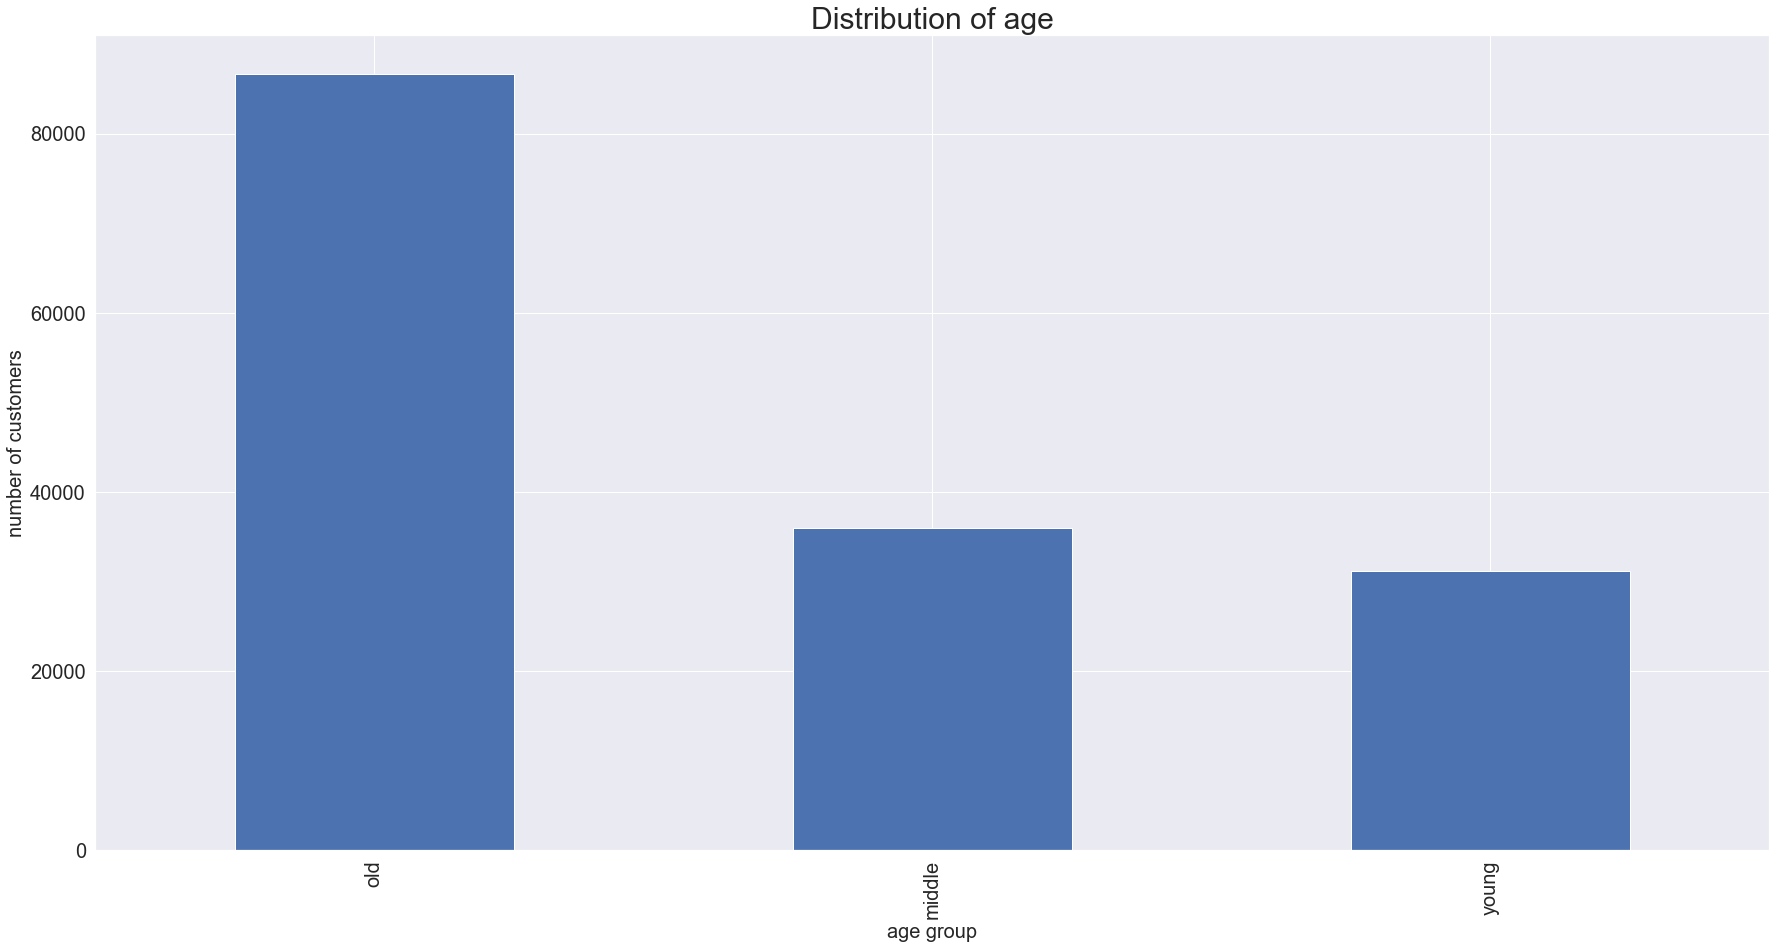

In [66]:
bar_1 = df_new['age_profile'].value_counts().plot.bar(fontsize=20)
plt.title('Distribution of age', fontsize=30)
plt.xlabel('age group', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

In [67]:
# histogram for income distribution with income profile

Text(0, 0.5, 'number of customers')

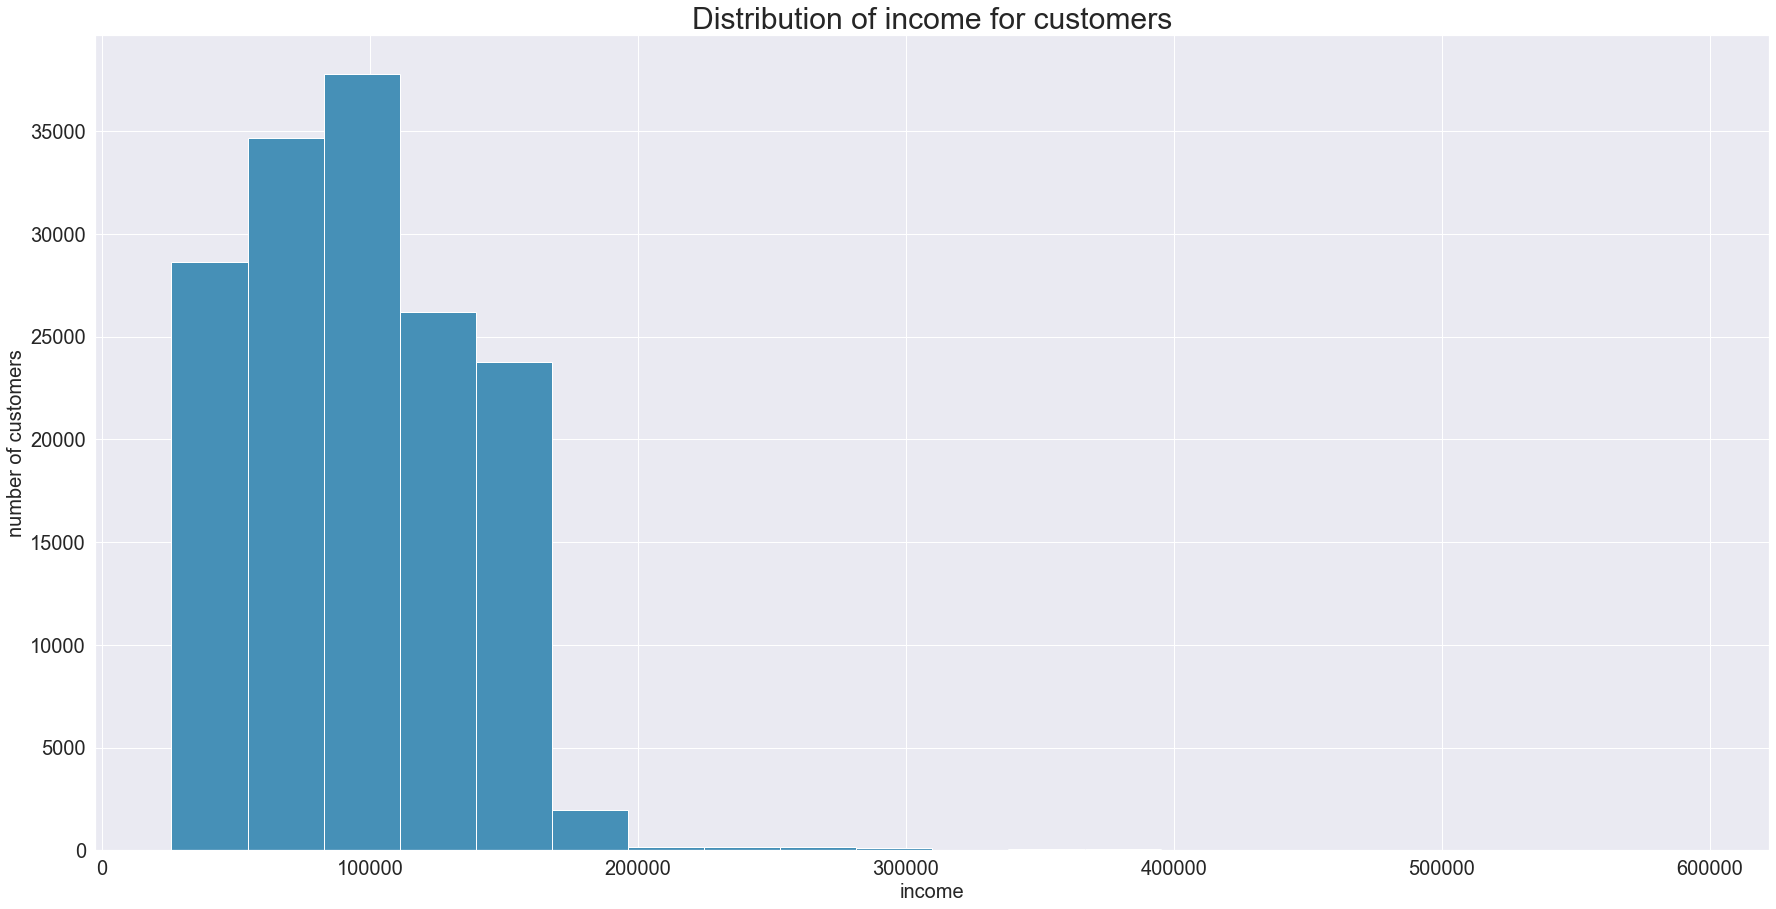

In [68]:
hist_1 = df_new['income'].plot.hist(bins=20, color='#4690b7', fontsize=20)
plt.title('Distribution of income for customers', fontsize=30)
plt.xlabel('income', fontsize=20)
plt.ylabel('number of customers', fontsize=20)

In [69]:
# crosstab for age distribution and dependancy

In [70]:
dependant = pd.crosstab(df_new['age_profile'], df_new['dependant_profile'])

In [71]:
# bar chart for number of dependant customer and their age distribution

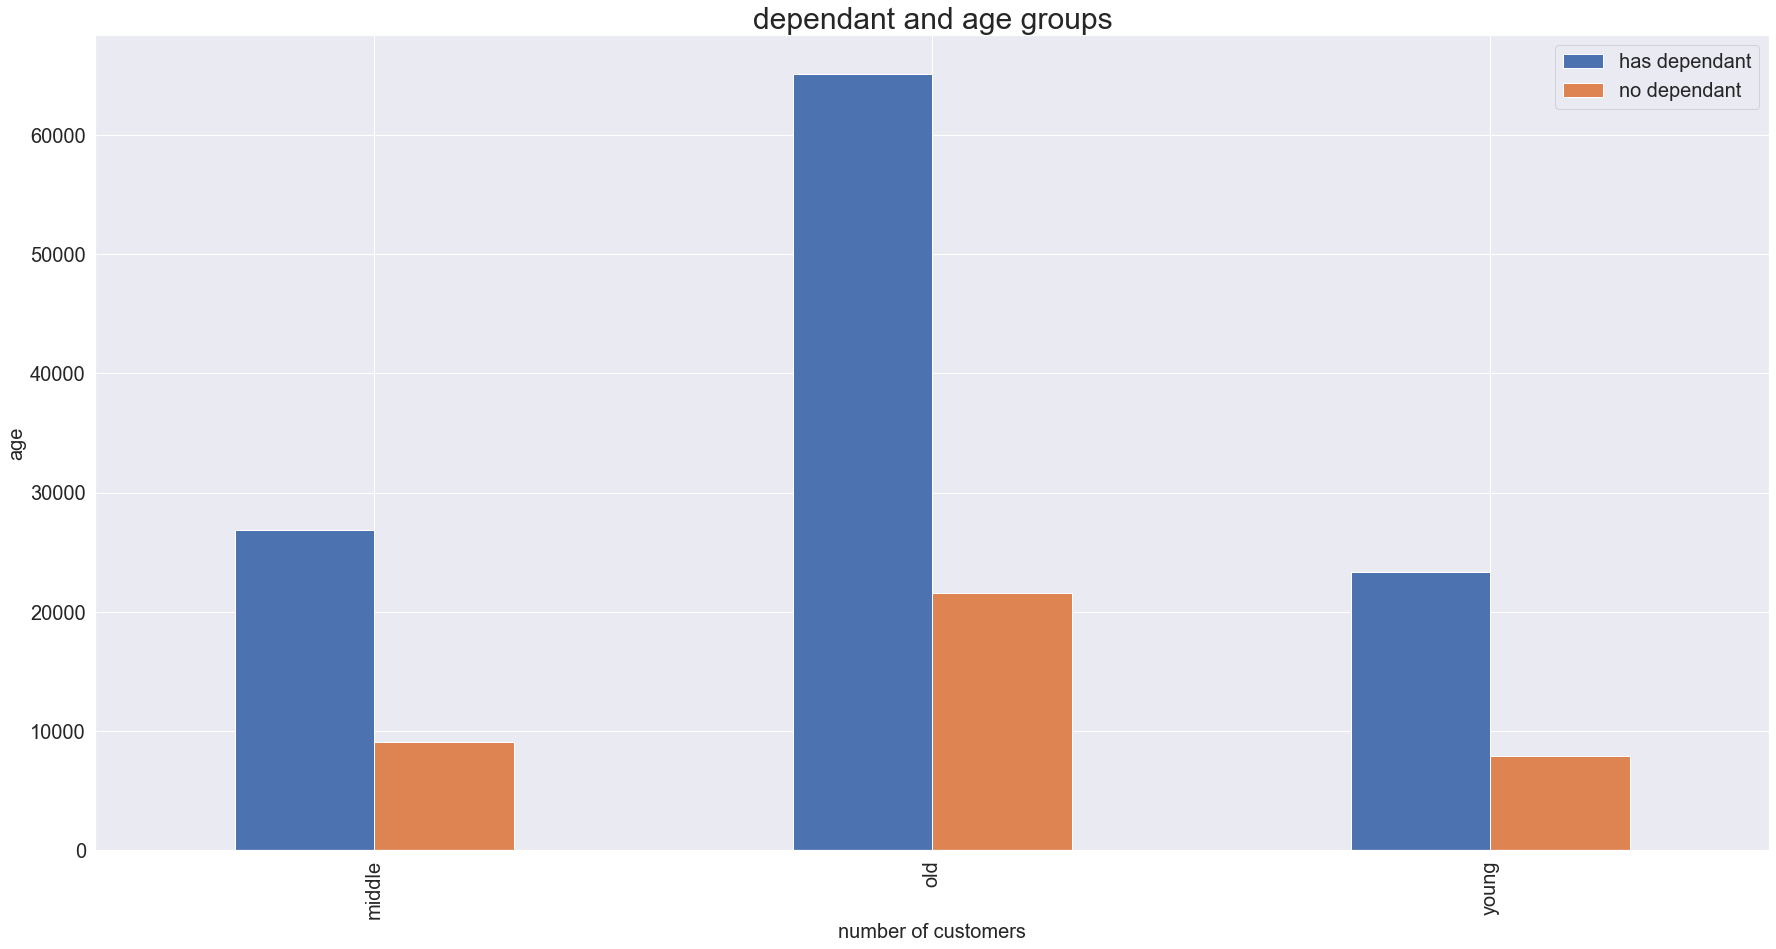

In [72]:
bar_2 = dependant.plot.bar(fontsize=20)
plt.title('dependant and age groups', fontsize=30)
plt.xlabel('number of customers', fontsize=20)
plt.ylabel('age', fontsize=20)
plt.legend(fontsize=20)

In [73]:
# crosstab for dependancy and experiency of buying baby stuff

In [74]:
# "no dependant with 1" may be considered as the customers who bought baby stuff for a gift
pd.crosstab(df_new['dependant_profile'], df_new['baby_profile'])

baby_profile,0,1
dependant_profile,,
has dependant,93906,21404
no dependant,31328,7167


In [75]:
df_new['baby_profile'].value_counts()

0    125234
1     28571
Name: baby_profile, dtype: int64

In [76]:
# pie for the experiency of buying baby stuff

<AxesSubplot:>

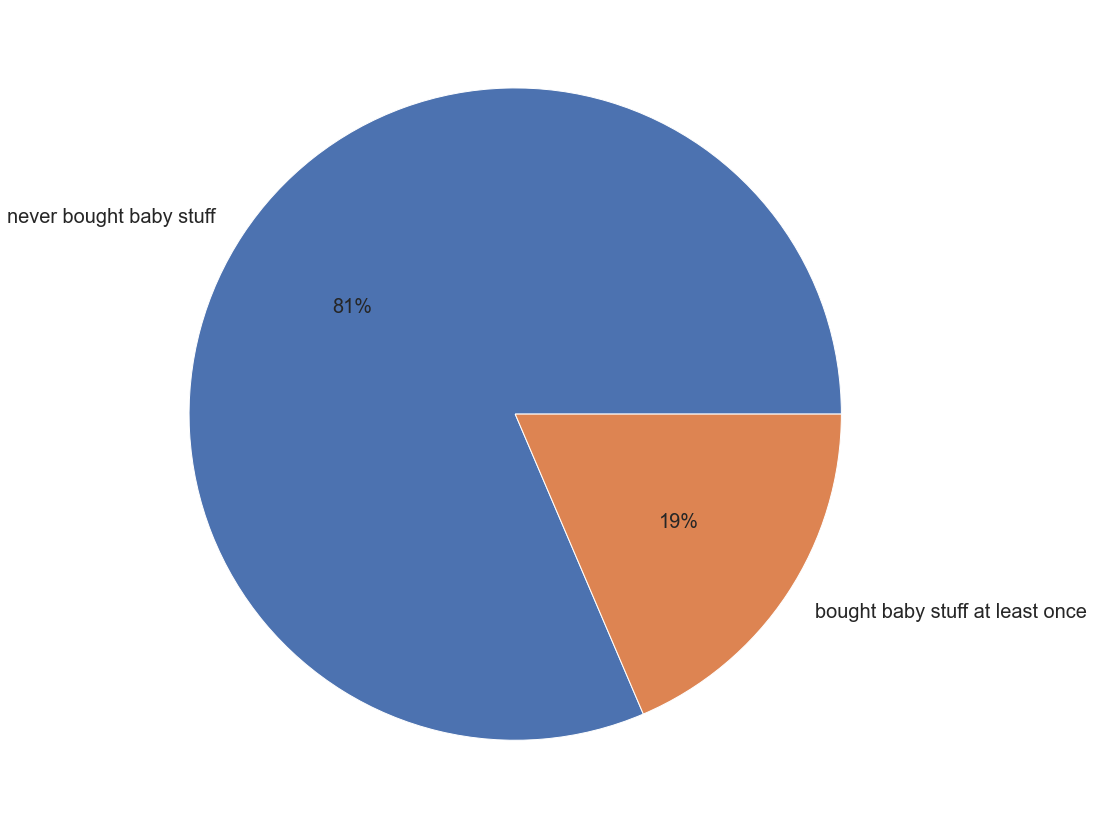

In [77]:
baby_chart = df_new['baby_profile'].value_counts()
pie = baby_chart.plot.pie(label='', labels=['never bought baby stuff', 'bought baby stuff at least once'],autopct=('%1.f%%'), textprops={'fontsize': 20})
pie

In [78]:
df_new['pet_profile'].value_counts()

0    141390
1     12415
Name: pet_profile, dtype: int64

In [79]:
# pie for the experiency of buying pet stuff

<AxesSubplot:>

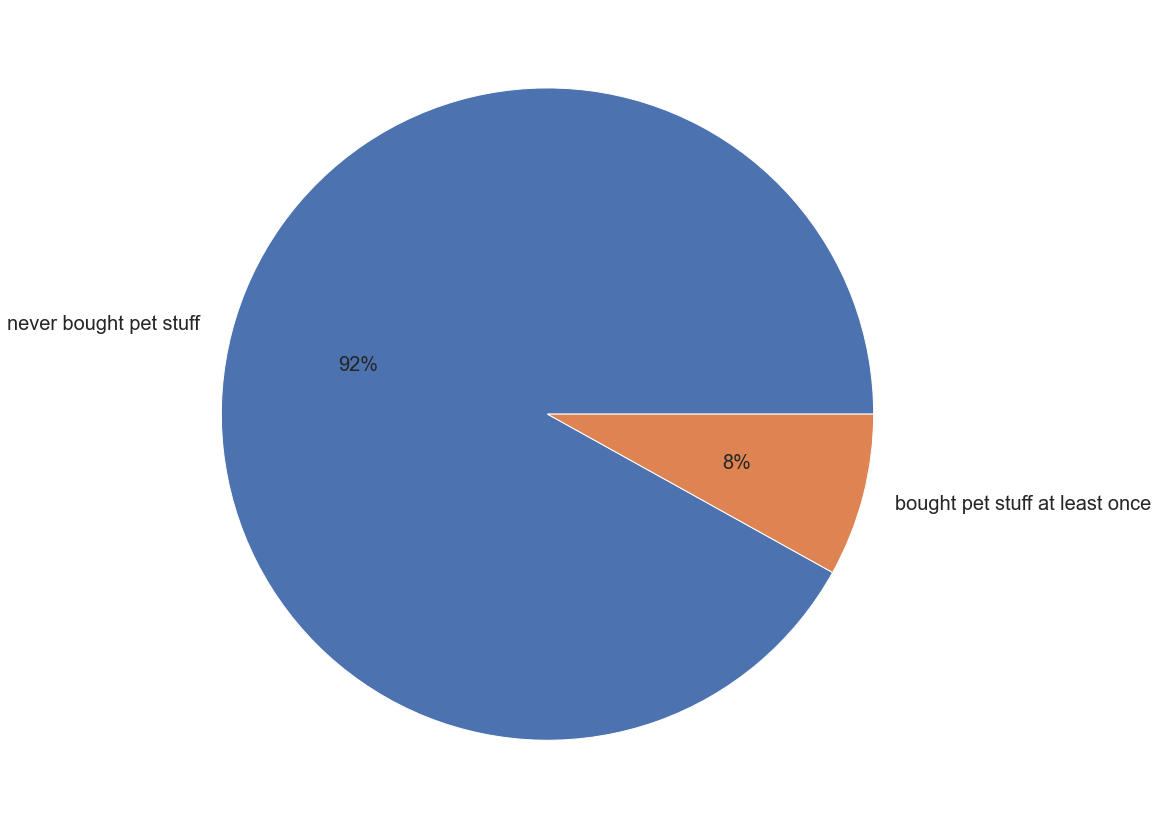

In [80]:
pet_chart=df_new['pet_profile'].value_counts()
pie_2=pet_chart.plot.pie(label='', labels=['never bought pet stuff', 'bought pet stuff at least once'],autopct=('%1.f%%'), textprops={'fontsize': 20})
pie_2

# 8. Compare customers’ profile with regions and departments

### Age Profile

In [81]:
# age distribution in each region

In [82]:
age_region=pd.crosstab(df_merged['region'], df_merged['age_profile'].sort_values(ascending=False))
age_region=age_region.reindex(['young', 'middle', 'old'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
age_region

age_profile,young,middle,old
region,,,
South,2004995,2319978,5421957
West,1517781,1723595,4244733
Midwest,1376926,1624085,3858844
Northeast,1053744,1192513,2931787


In [83]:
# bar chart for age distribution in each region

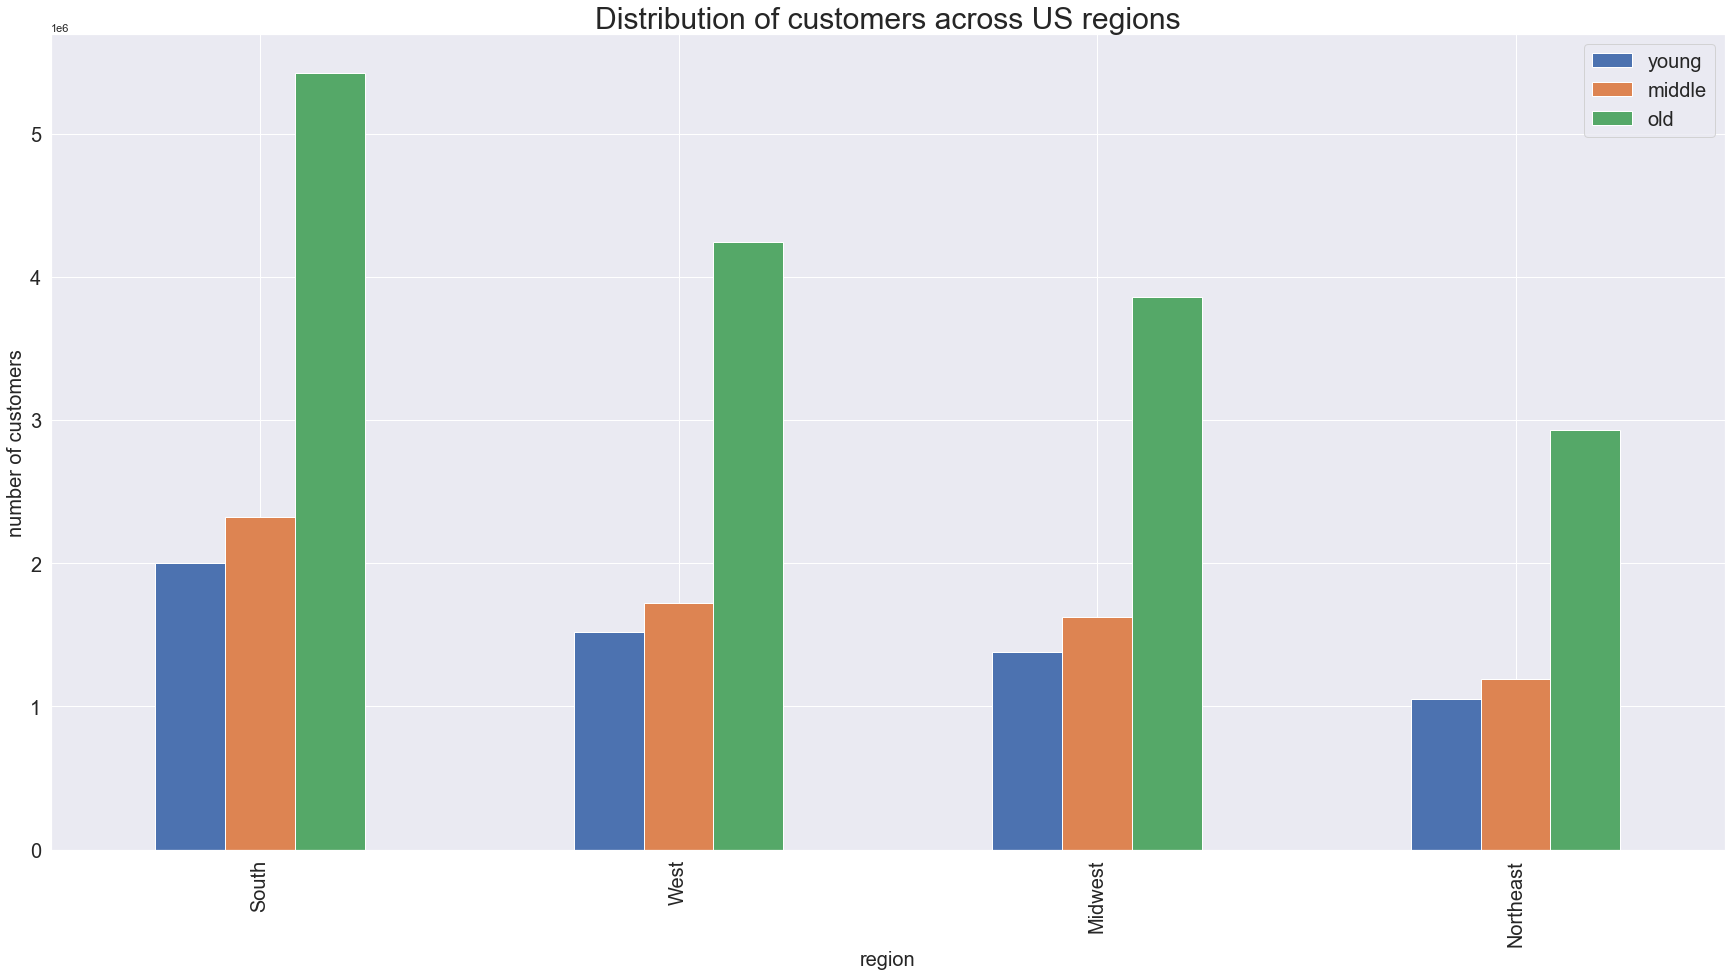

In [84]:
bar_3 = age_region.plot.bar(fontsize=20)
plt.title('Distribution of customers across US regions', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)
plt.legend(fontsize=20)

In [85]:
# bar chart for number of orders of each item

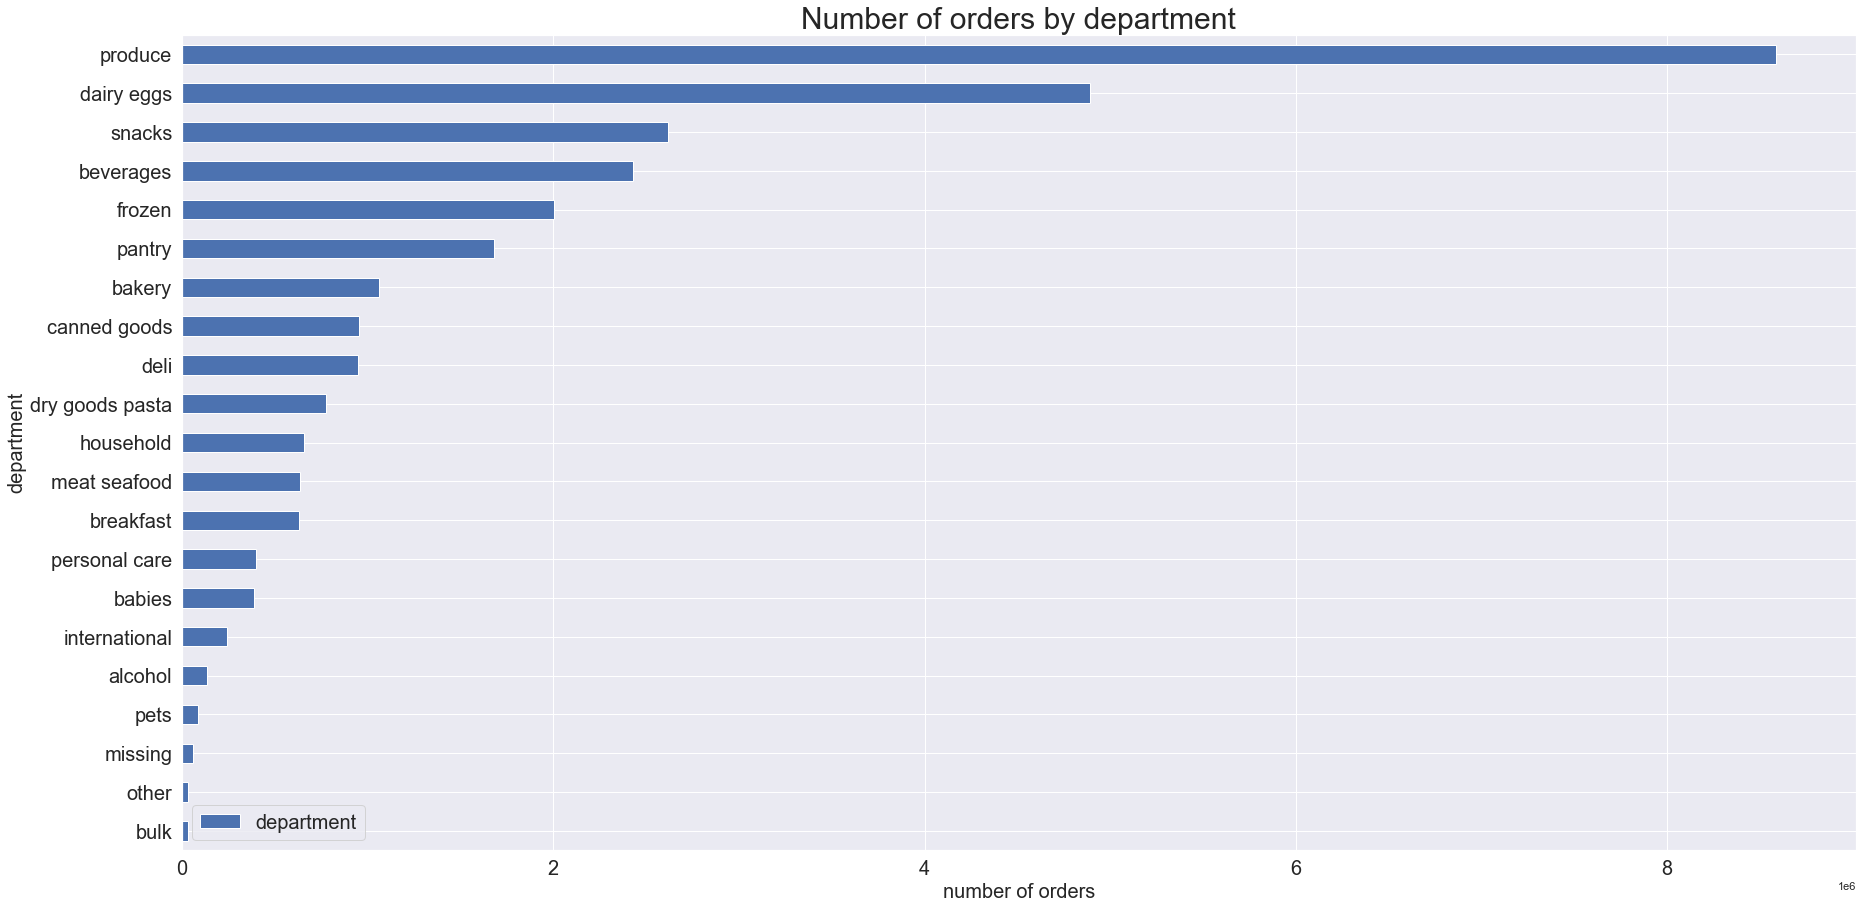

In [86]:
bar_4 = df_merged['department'].value_counts(dropna=False).sort_values(ascending=True).plot.barh(fontsize=20)
plt.title('Number of orders by department', fontsize=30)
plt.xlabel('number of orders', fontsize=20)
plt.ylabel('department', fontsize=20)
plt.legend(fontsize=20)

In [87]:
# crosstab of item consumtion by age groups

In [88]:
age_department=pd.crosstab(df_merged['department'], df_merged['age_profile'])
age_department=age_department.reindex(['young', 'middle', 'old'], axis="columns")
age_department

age_profile,young,middle,old
department,,,
alcohol,29394,32642,75906
babies,79170,91404,217165
bakery,214986,249756,595084
beverages,490261,563901,1376495
breakfast,129787,148399,354569
bulk,6590,7342,17628
canned goods,196891,222827,537114
dairy eggs,995743,1153296,2743101
deli,192138,223889,532772


In [89]:
# crosstab of top 5 item consumtion by age groups

In [90]:
df_age_department = df_merged.loc[df_merged['department'].isin(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])]

In [91]:
age_department_5 = pd.crosstab(index=df_age_department['department'], columns=df_age_department['age_profile'], normalize='index')
age_department_5 = age_department_5.reindex(['young', 'middle', 'old'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])
age_department_5_labels = pd.crosstab(index=df_age_department['department'], columns=df_age_department['age_profile'])
age_department_5_labels = age_department_5_labels.reindex(['young', 'middle', 'old'], axis="columns").reindex(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'])

In [92]:
# bar chart for top 5 item consumtion by age groups

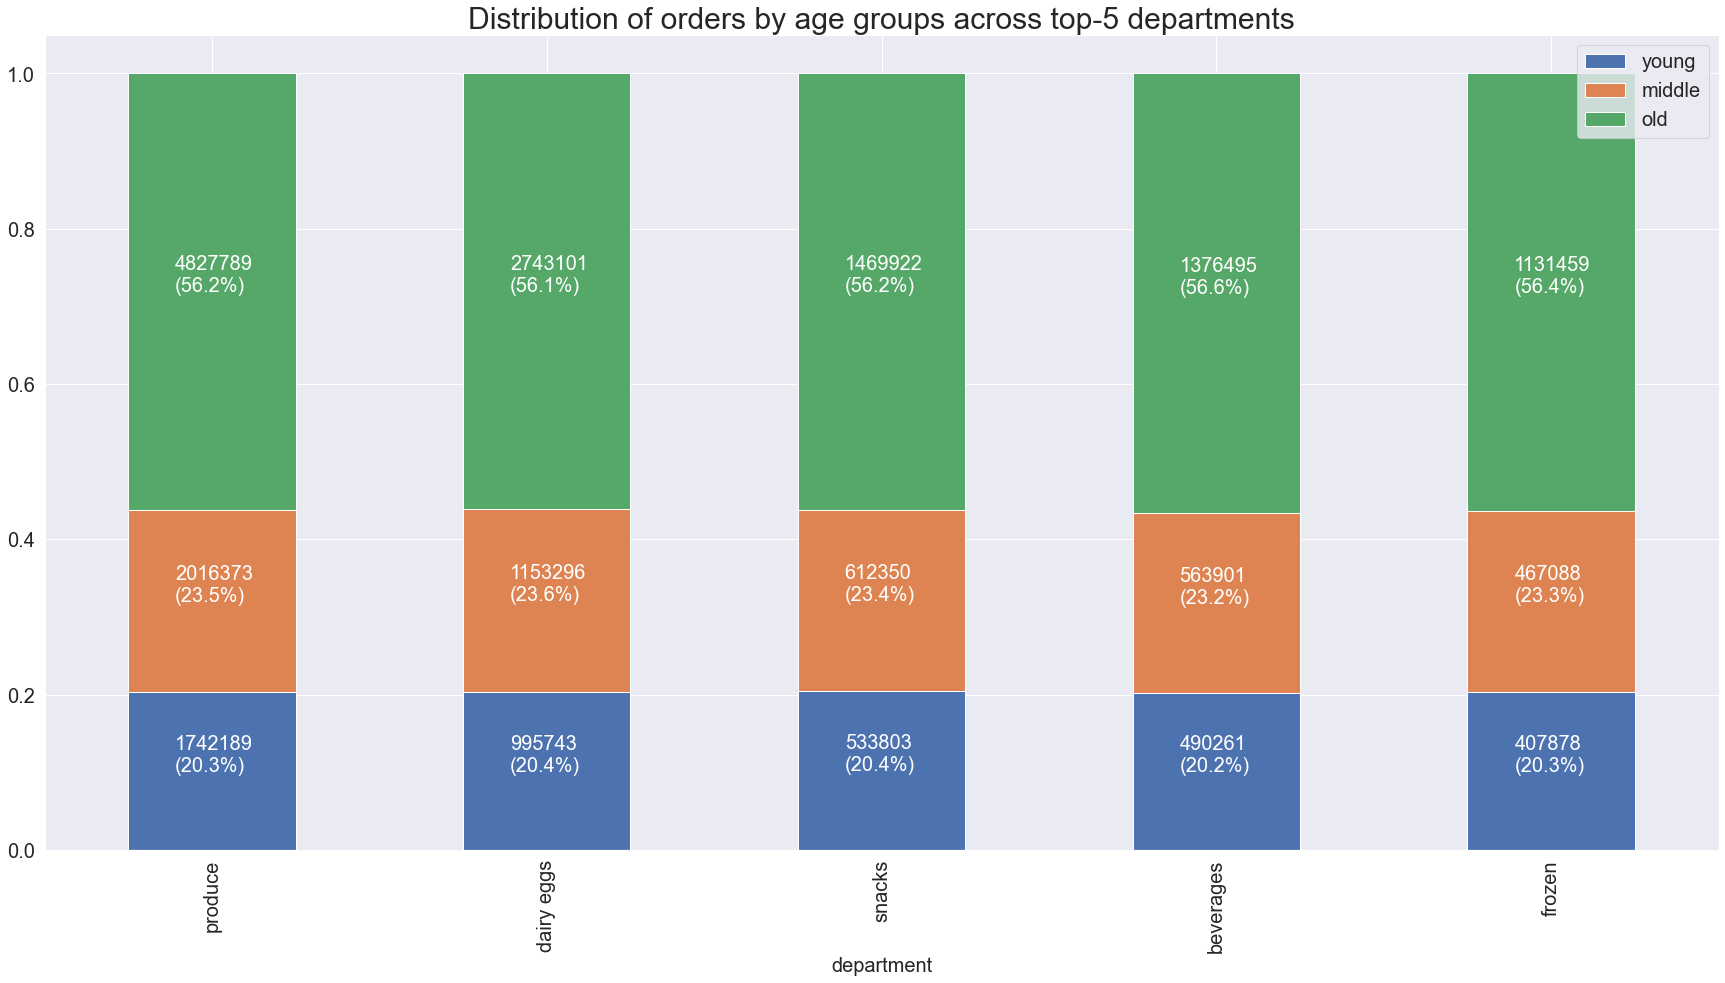

In [93]:
bar_5 = age_department_5.plot.bar(stacked=True, fontsize=20)
plt.title('Distribution of orders by age groups across top-5 departments', fontsize=30)
plt.xlabel('department', fontsize=20)
plt.legend(fontsize=20)
for n, y in enumerate([*age_department_5.index.values]):
    for (proportion, count, x_loc) in zip(age_department_5.loc[y],
                                         age_department_5_labels.loc[y],
                                          age_department_5.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [94]:
# crosstab of age goups and loyalty flag

In [95]:
loyalty_age = pd.crosstab(df_merged['age_profile'], df_merged['loyalty_flag'].sort_values(ascending=False))
loyalty_age = loyalty_age.reindex(['young', 'middle', 'old'])
loyalty_age

loyalty_flag,Loyal customer,New customer,Regular customer
age_profile,,,
young,1942775,782944,3081805
middle,2294346,884244,3512166
old,5470269,2147782,8426219


In [96]:
# pie for ratio of loyal customer in age groups

<AxesSubplot:>

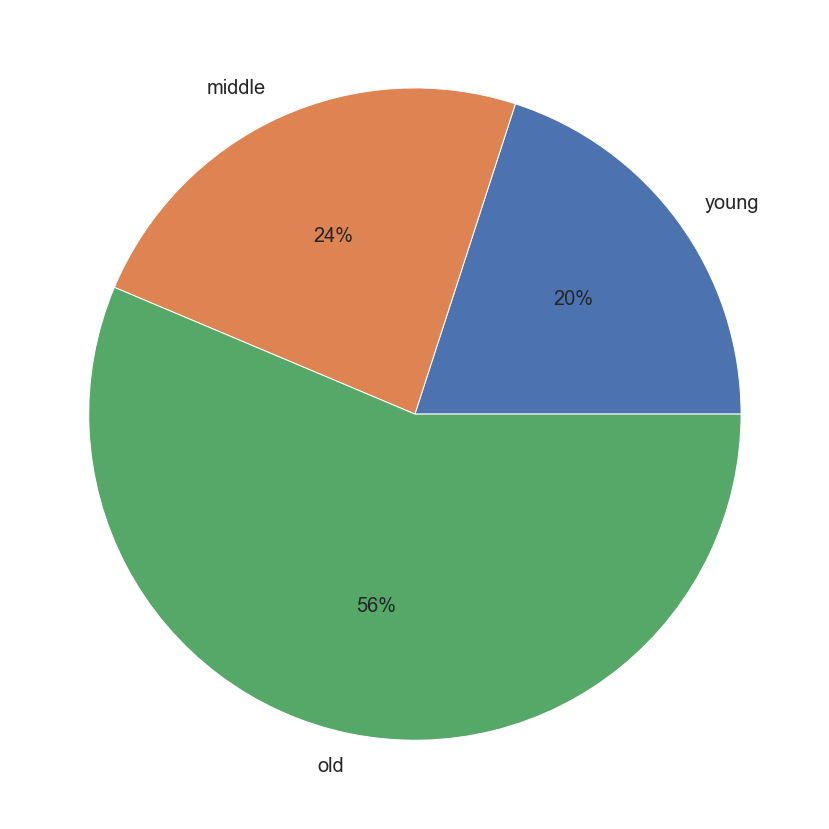

In [97]:
pie_3 = loyalty_age['Loyal customer'].plot.pie(label='',autopct=('%1.f%%'), textprops={'fontsize': 20})
pie_3

In [98]:
# pie for ratio of regular customer in age groups

<AxesSubplot:>

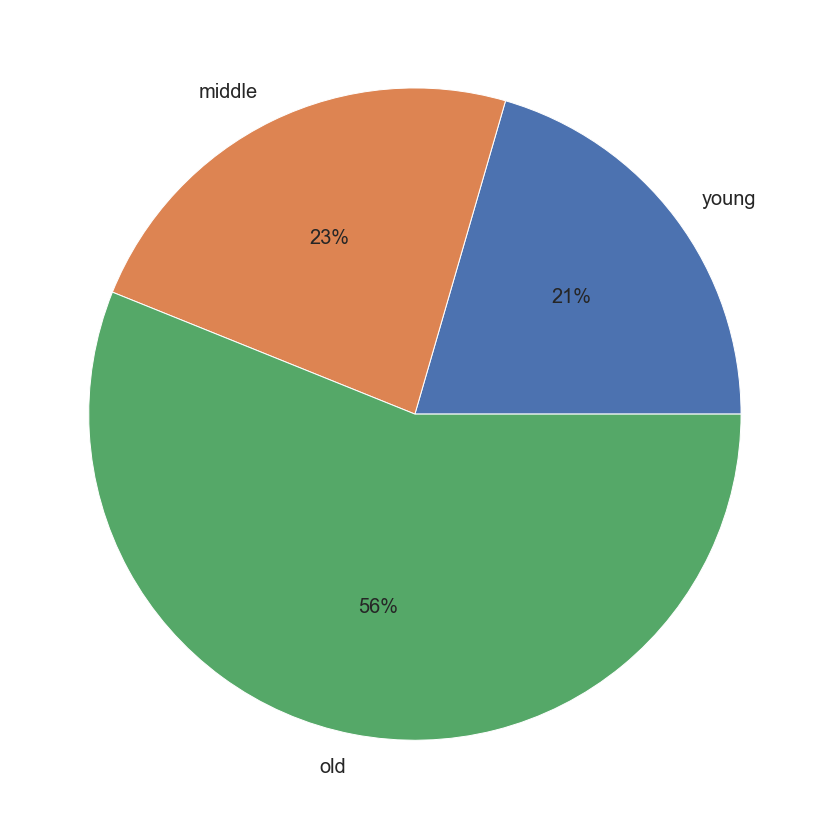

In [99]:
pie_4 = loyalty_age['Regular customer'].plot.pie(label='',autopct=('%1.f%%'), textprops={'fontsize': 20})
pie_4

In [100]:
# pie for ratio of new customer in age groups

<AxesSubplot:>

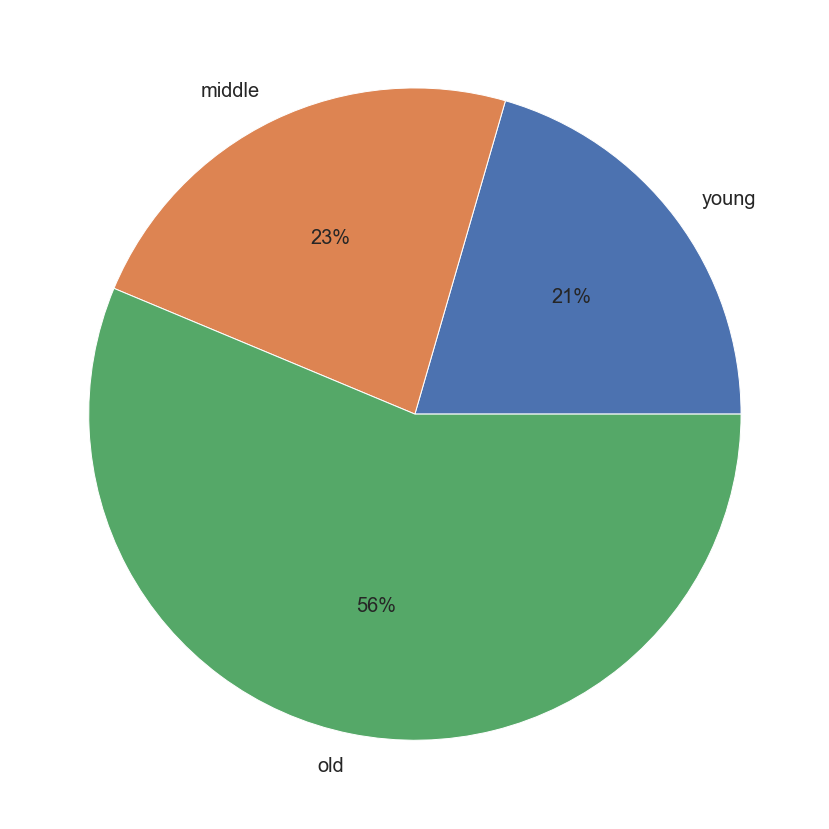

In [101]:
pie_5 = loyalty_age['New customer'].plot.pie(label='',autopct=('%1.f%%'), textprops={'fontsize': 20})
pie_5

In [102]:
# crosstab of order hours in each age group

In [103]:
age_order_hour = pd.crosstab(df_merged['order_hour_of_day'], df_merged['age_profile'])
age_order_hour = age_order_hour.reindex(['young', 'middle', 'old'], axis="columns")
age_order_hour

age_profile,young,middle,old
order_hour_of_day,,,
0,40515,48286,107691
1,21240,25564,56668
2,13272,14831,33572
3,9454,10940,25012
4,9743,10478,26854
5,16490,18099,45276
6,55548,62266,148215
7,165018,187250,462977
8,316968,364736,886643


In [104]:
# line chart for each age group's number of orders in each hour

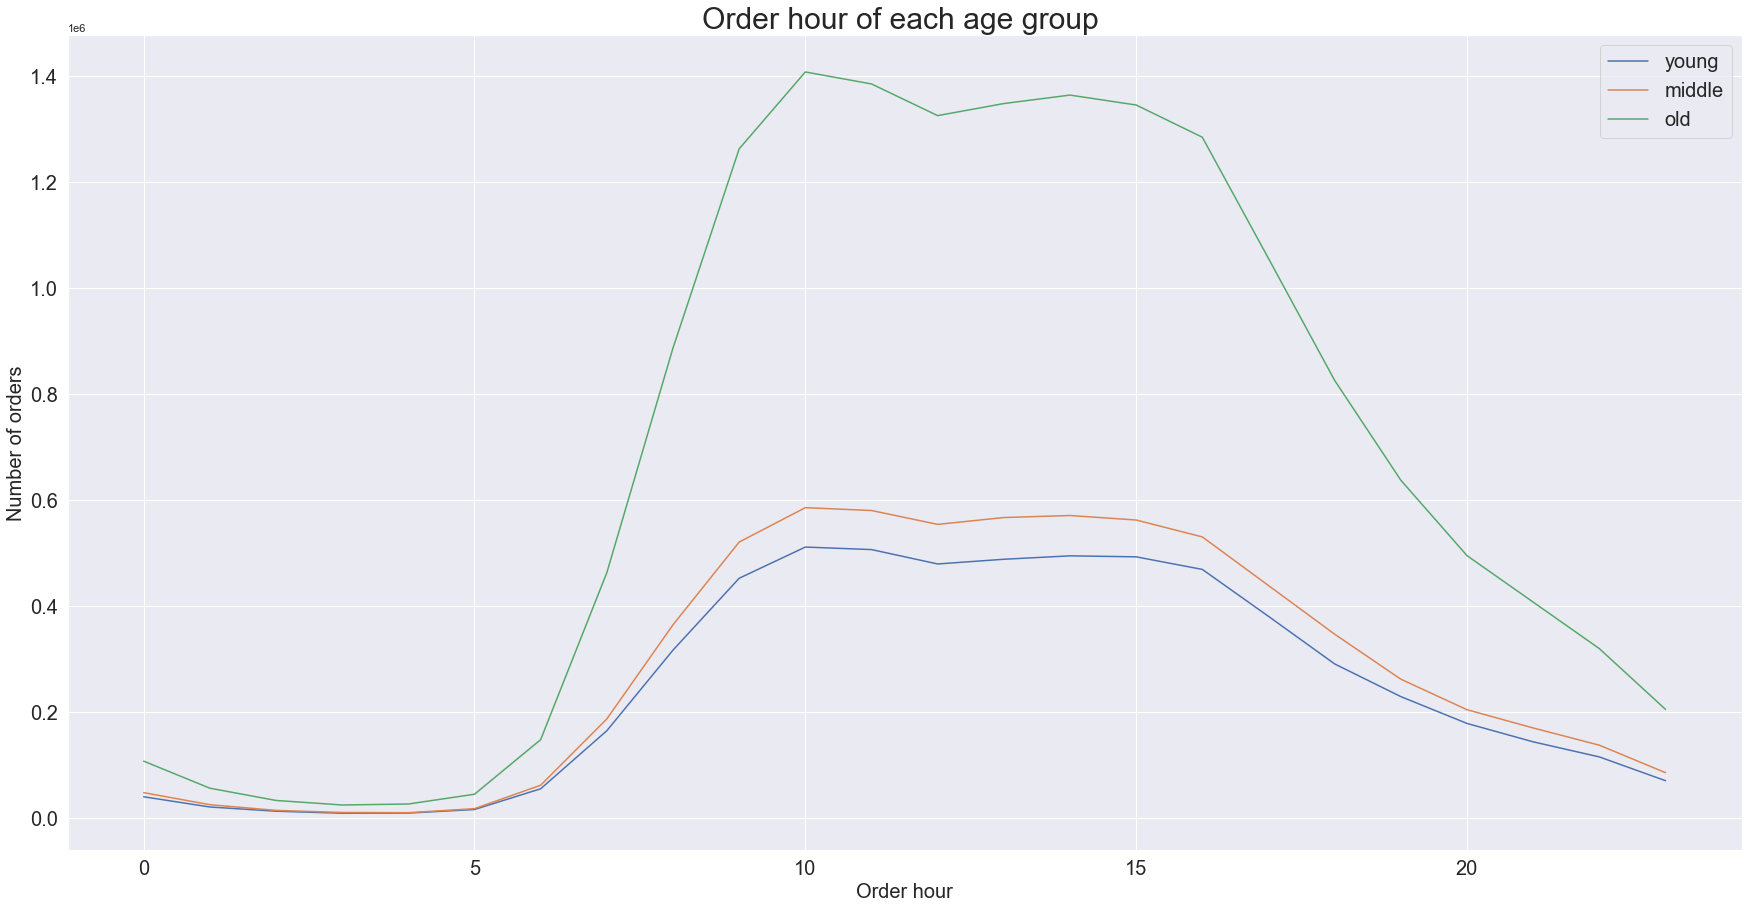

In [105]:
line_age_order_hour = age_order_hour.plot(kind='line', fontsize=20)
plt.title('Order hour of each age group ', fontsize=30)
plt.xlabel('Order hour', fontsize=20)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)

In [106]:
# crosstab of order days of the week in each age group

In [107]:
age_order_week = pd.crosstab(df_merged['order_date_of_week'], df_merged['age_profile'])
age_order_week = age_order_week.reindex(['young', 'middle', 'old'], axis="columns").rename(index={0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
age_order_week

age_profile,young,middle,old
order_date_of_week,,,
Saturday,1138646,1314256,3132805
Sunday,1048972,1207113,2864268
Monday,770599,888348,2146479
Tuesday,700298,813425,1952759
Wednesday,693804,806579,1925185
Thursday,777585,893146,2142989
Friday,823542,937304,2292836


In [108]:
# line chart for each age group's number of orders in days of week

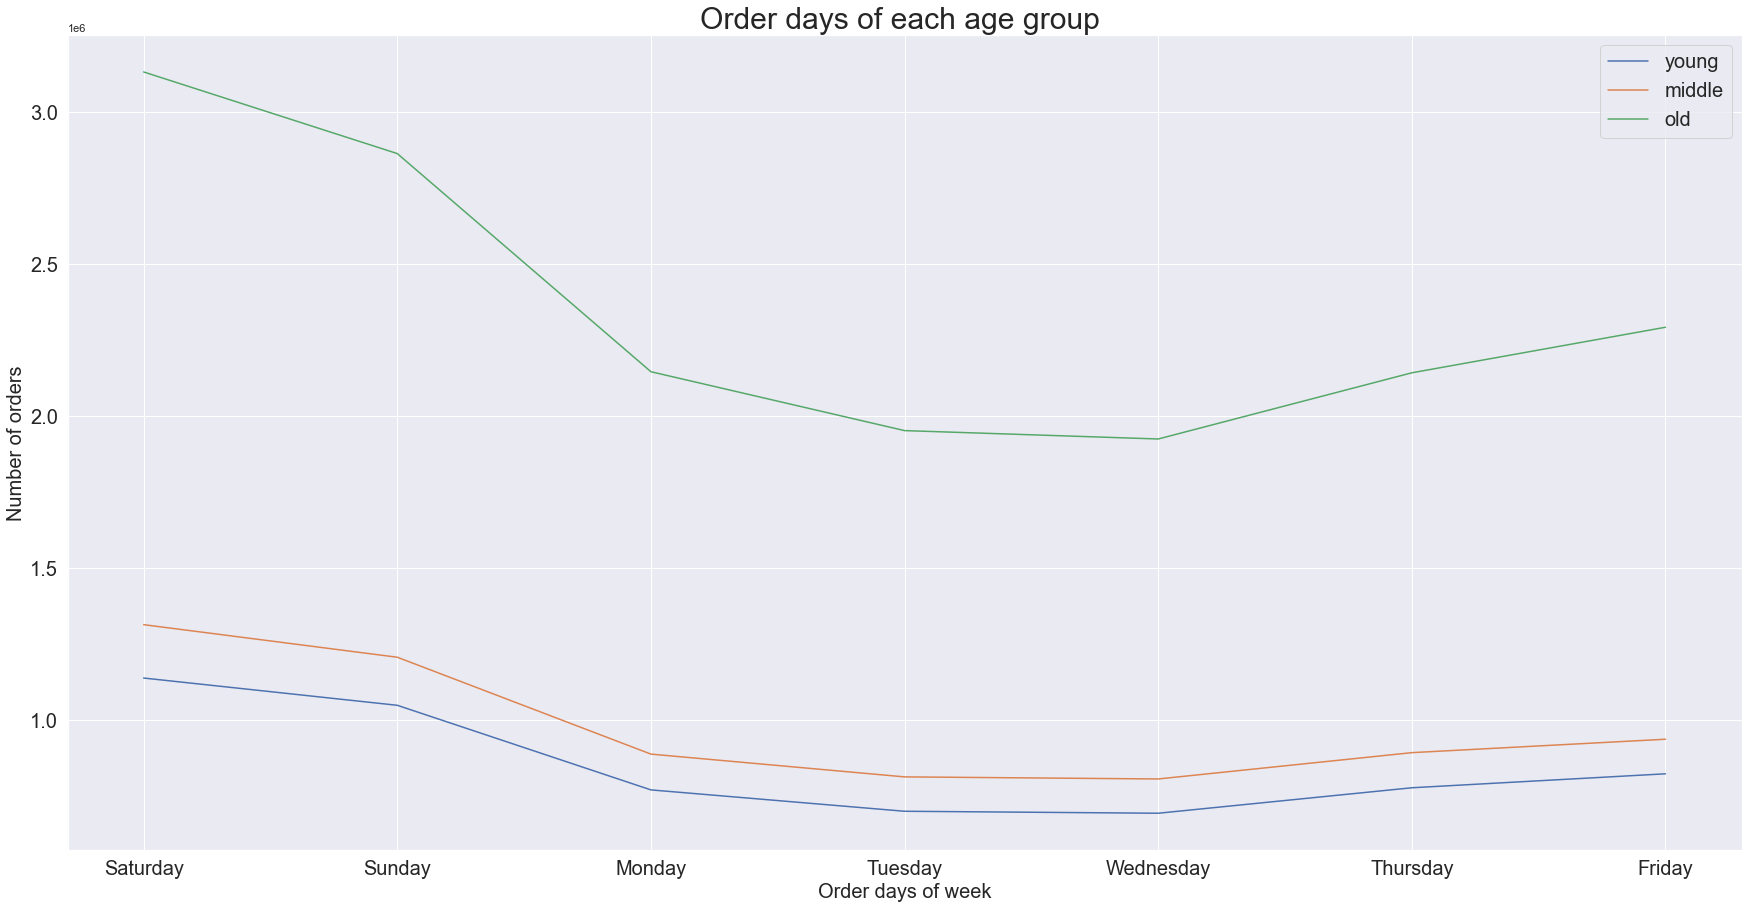

In [109]:
line_age_order_week = age_order_week.plot(kind='line', fontsize=20)
plt.title('Order days of each age group ', fontsize=30)
plt.xlabel('Order days of week', fontsize=20)
plt.ylabel('Number of orders', fontsize=20)
plt.legend(fontsize=20)

### Income Profile

In [110]:
# crosstab of each region's income group distribution

In [111]:
income_region=pd.crosstab(df_merged['region'], df_merged['income_profile'].sort_values(ascending=False))
income_region=income_region.reindex(['low', 'middle', 'high'], axis="columns").reindex(['South', 'West', 'Midwest', 'Northeast'])
income_region

income_profile,low,middle,high
region,,,
South,1423093,7375137,948700
West,1057694,5693320,735095
Midwest,965393,5221759,672703
Northeast,744984,3941175,491885


In [112]:
# bar chart for each region's income group distribution

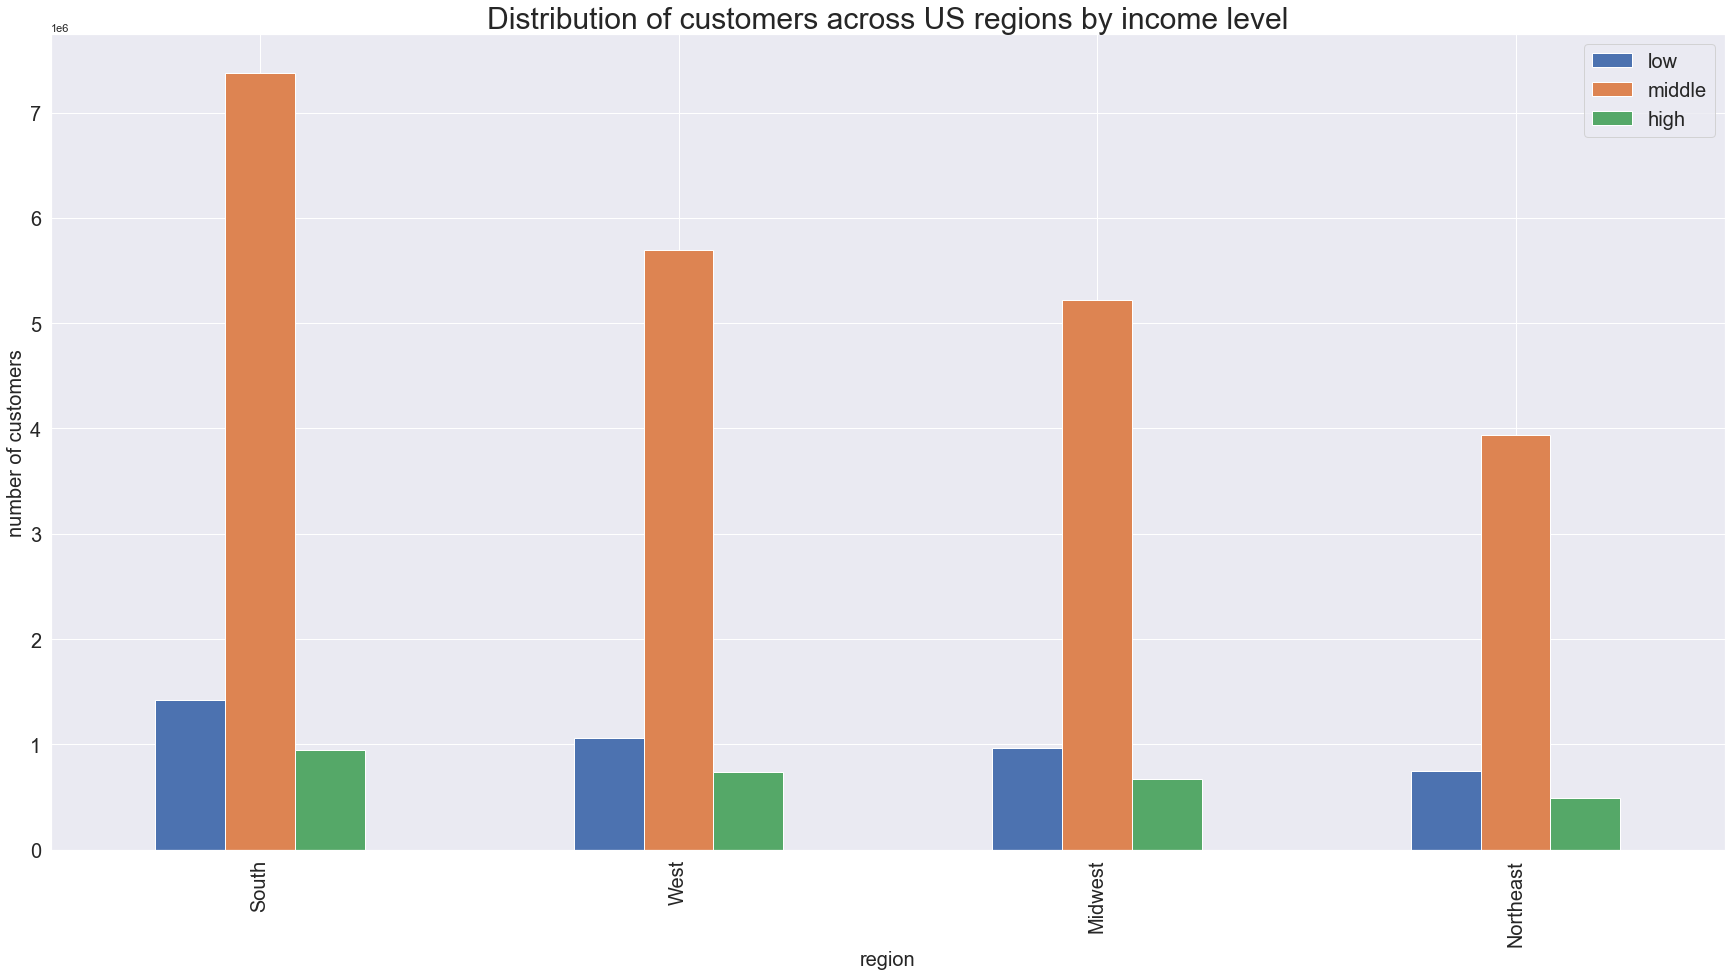

In [113]:
bar_6 = income_region.plot.bar(fontsize=20)
plt.title('Distribution of customers across US regions by income level', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.ylabel('number of customers', fontsize=20)
plt.legend(fontsize=20)

In [114]:
# consumption of low income

In [115]:
df_merged.loc[df_merged['income_profile']=='low']['department'].value_counts()

produce            1071985
dairy eggs          640063
snacks              634993
beverages           453215
frozen              272345
pantry              212703
bakery              135454
deli                133367
breakfast           109525
canned goods        106466
household           104530
dry goods pasta      86829
personal care        58999
meat seafood         51574
babies               39874
international        28555
alcohol              20824
pets                 11099
missing               8471
bulk                  5683
other                 4610
Name: department, dtype: int64

In [116]:
# consumption of middle income

In [117]:
df_merged.loc[df_merged['income_profile']=='middle']['department'].value_counts()

produce            6694423
dairy eggs         3768417
snacks             1757632
beverages          1746080
frozen             1531014
pantry             1301045
bakery              814350
canned goods        753331
deli                723266
dry goods pasta     612288
meat seafood        520447
household           486447
breakfast           462755
babies              309148
personal care       301211
international       189478
alcohol              98546
pets                 66991
missing              46755
other                24353
bulk                 23414
Name: department, dtype: int64

In [118]:
# consumption of high income

In [119]:
df_merged.loc[df_merged['income_profile']=='high']['department'].value_counts()

produce            819943
dairy eggs         483660
beverages          231362
snacks             223450
frozen             203066
pantry             170005
bakery             110022
canned goods        97035
deli                92166
dry goods pasta     78687
household           69065
meat seafood        67047
breakfast           60475
personal care       39451
babies              38717
international       24066
alcohol             18572
pets                 9763
missing              6056
other                3312
bulk                 2463
Name: department, dtype: int64

In [120]:
# crosstab of loyalty flag by income group

In [121]:
loyalty_income = pd.crosstab(df_merged['loyalty_flag'], df_merged['income_profile'])
loyalty_income

income_profile,high,low,middle
loyalty_flag,,,
Loyal customer,954695,1297928,7454767
New customer,348466,642352,2824152
Regular customer,1477189,2138991,11404010


In [122]:
df_merged.loc[df_merged['prices'] > 15,'price_range'] = 'High-range product'
df_merged.loc[(df_merged['prices'] > 5)&(df_merged['prices'] <= 15), 'price_range'] = 'Mid-range product'
df_merged.loc[df_merged['prices'] <= 5, 'price_range'] = 'Low-range product'

In [123]:
income_price = pd.crosstab(index = df_merged['price_range'], columns = df_merged['income_profile'], normalize='index')
income_price = income_price.reindex(['low', 'middle', 'high'], axis="columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label = pd.crosstab(index = df_merged['price_range'], columns = df_merged['income_profile'])
income_price_label = income_price_label.reindex(['low', 'middle', 'high'], axis = "columns").reindex(['Low-range product', 'Mid-range product', 'High-range product'])
income_price_label

income_profile,low,middle,high
price_range,,,
Low-range product,1651903,6641410,851084
Mid-range product,2511535,15283255,1954880
High-range product,27726,305432,39169


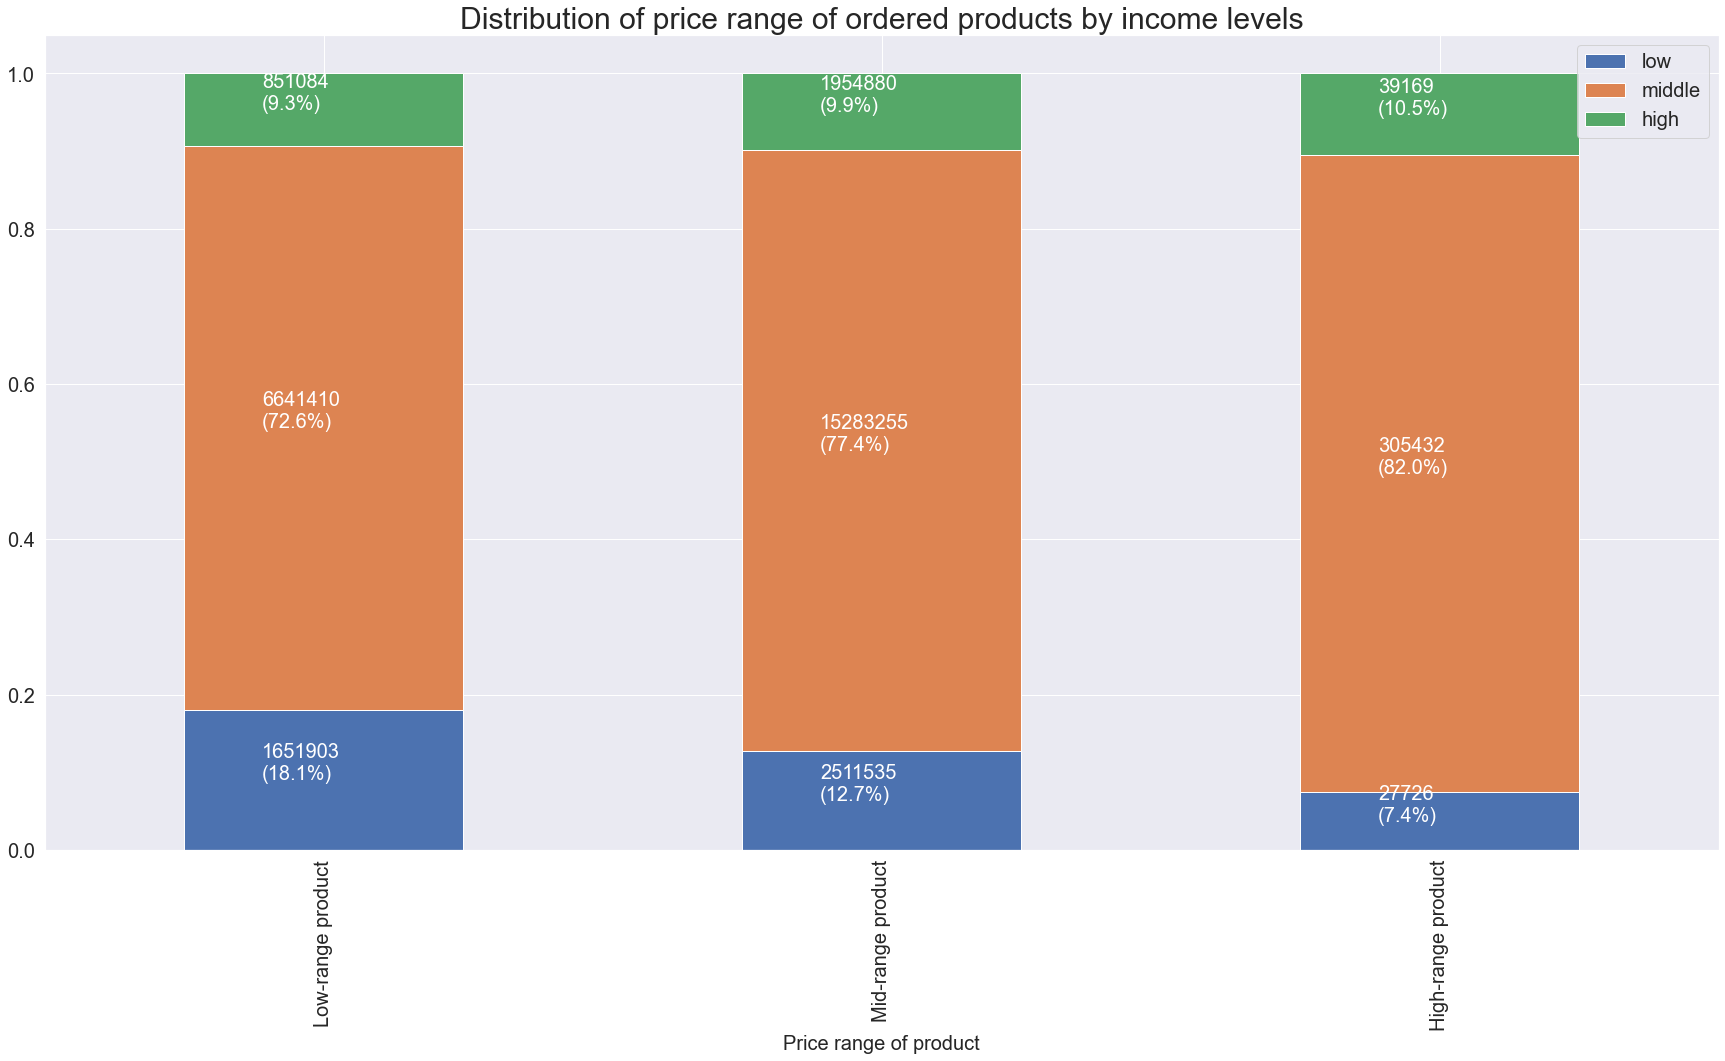

In [124]:
bar_10 = income_price.plot.bar(stacked=True, fontsize=20)
plt.title('Distribution of price range of ordered products by income levels', fontsize=30)
plt.xlabel('Price range of product', fontsize=20)
plt.legend(fontsize = 20, loc = 'upper right')
for n, y in enumerate([*income_price.index.values]):
    for (proportion, count, x_loc) in zip(income_price.loc[y],
                                         income_price_label.loc[y],
                                         income_price.loc[y].cumsum()):
                
        plt.text(y = (x_loc - proportion) + (proportion / 2),
                 x = n - 0.11,
                 s = f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color = "white",
                 fontsize = 20)

### Dependant Profile

In [125]:
# crosstab of age group distribution in dependancy status

In [126]:
dependant=pd.crosstab(df_merged['age_profile'], df_merged['dependant_profile'])
dependant

dependant_profile,has dependant,no dependant
age_profile,,
middle,5146106,1714065
old,12330861,4126460
young,4481451,1471995


In [127]:
# order frequency by dependancy status

In [128]:
dependant_frequency=pd.crosstab(index=df_merged['customer_frequency'], columns=df_merged['dependant_profile'], normalize='index')
dependant_frequency_label=pd.crosstab(index=df_merged['customer_frequency'], columns=df_merged['dependant_profile'])
dependant_frequency_label

dependant_profile,has dependant,no dependant
customer_frequency,,
Frequent customer,13288000,4432923
Non-frequent customer,3348252,1108749
Regular customer,4143036,1378552


In [129]:
# bar chart for order frequency by dependancy status

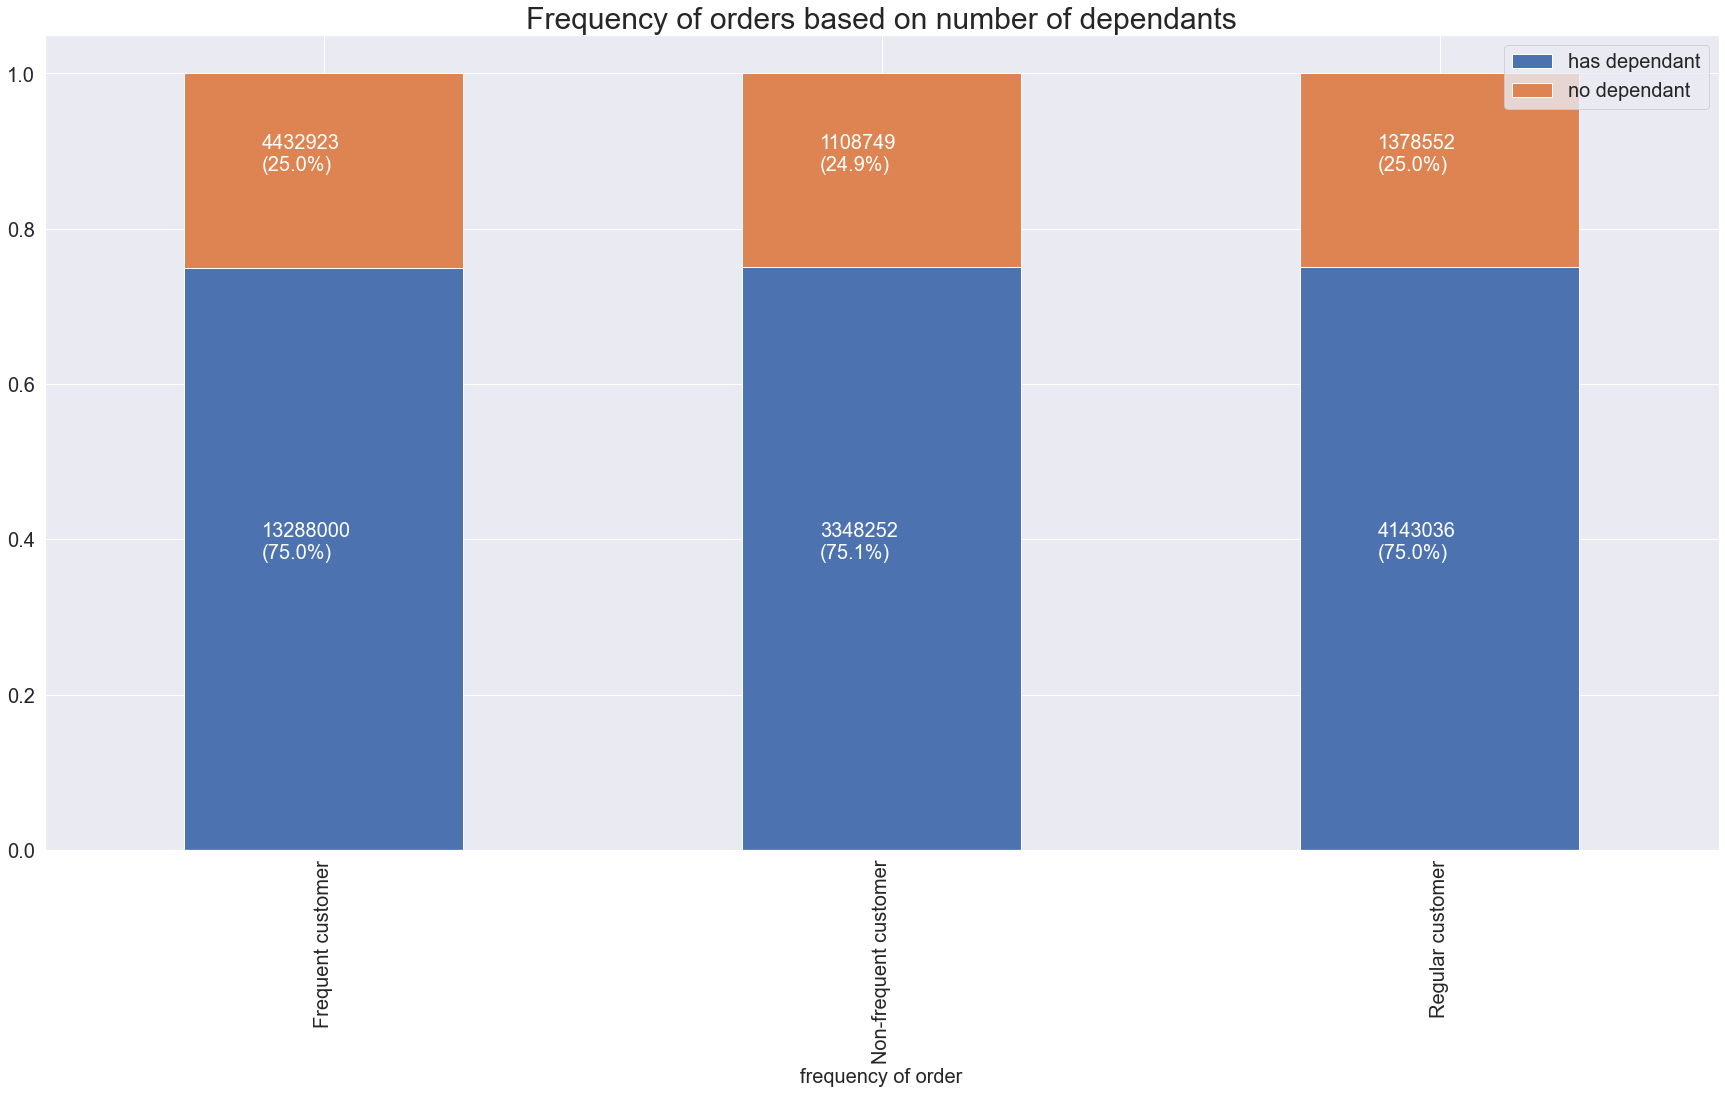

In [130]:
bar_7 = dependant_frequency.plot.bar(stacked=True, fontsize=20)
plt.title('Frequency of orders based on number of dependants', fontsize=30)
plt.xlabel('frequency of order', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*dependant_frequency.index.values]):
    for (proportion, count, x_loc) in zip(dependant_frequency.loc[y],
                                        dependant_frequency_label.loc[y],
                                         dependant_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

### Baby Profile

In [131]:
# crosstab of order frequency and experiency of buying baby stuff

In [132]:
baby_frequency=pd.crosstab(index=df_merged['customer_frequency'], columns=df_merged['baby_profile'], normalize='index')
baby_frequency=baby_frequency.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency=baby_frequency.rename(columns={0:'didn\'t buy baby stuff', 1:'bought baby stuff'})
baby_frequency_label=pd.crosstab(index=df_merged['customer_frequency'], columns=df_merged['baby_profile'])
baby_frequency_label=baby_frequency_label.reindex(['Frequent customer', 'Regular customer','Non-frequent customer'])
baby_frequency_label=baby_frequency_label.rename(columns={0:'didn\'t buy baby stuff', 1:'bought baby stuff'})
baby_frequency_label

baby_profile,didn't buy baby stuff,bought baby stuff
customer_frequency,,
Frequent customer,11362491,6358432
Regular customer,3992769,1528819
Non-frequent customer,3448887,1008114


In [133]:
# bar chart for order frequency and experiency of buying baby stuff

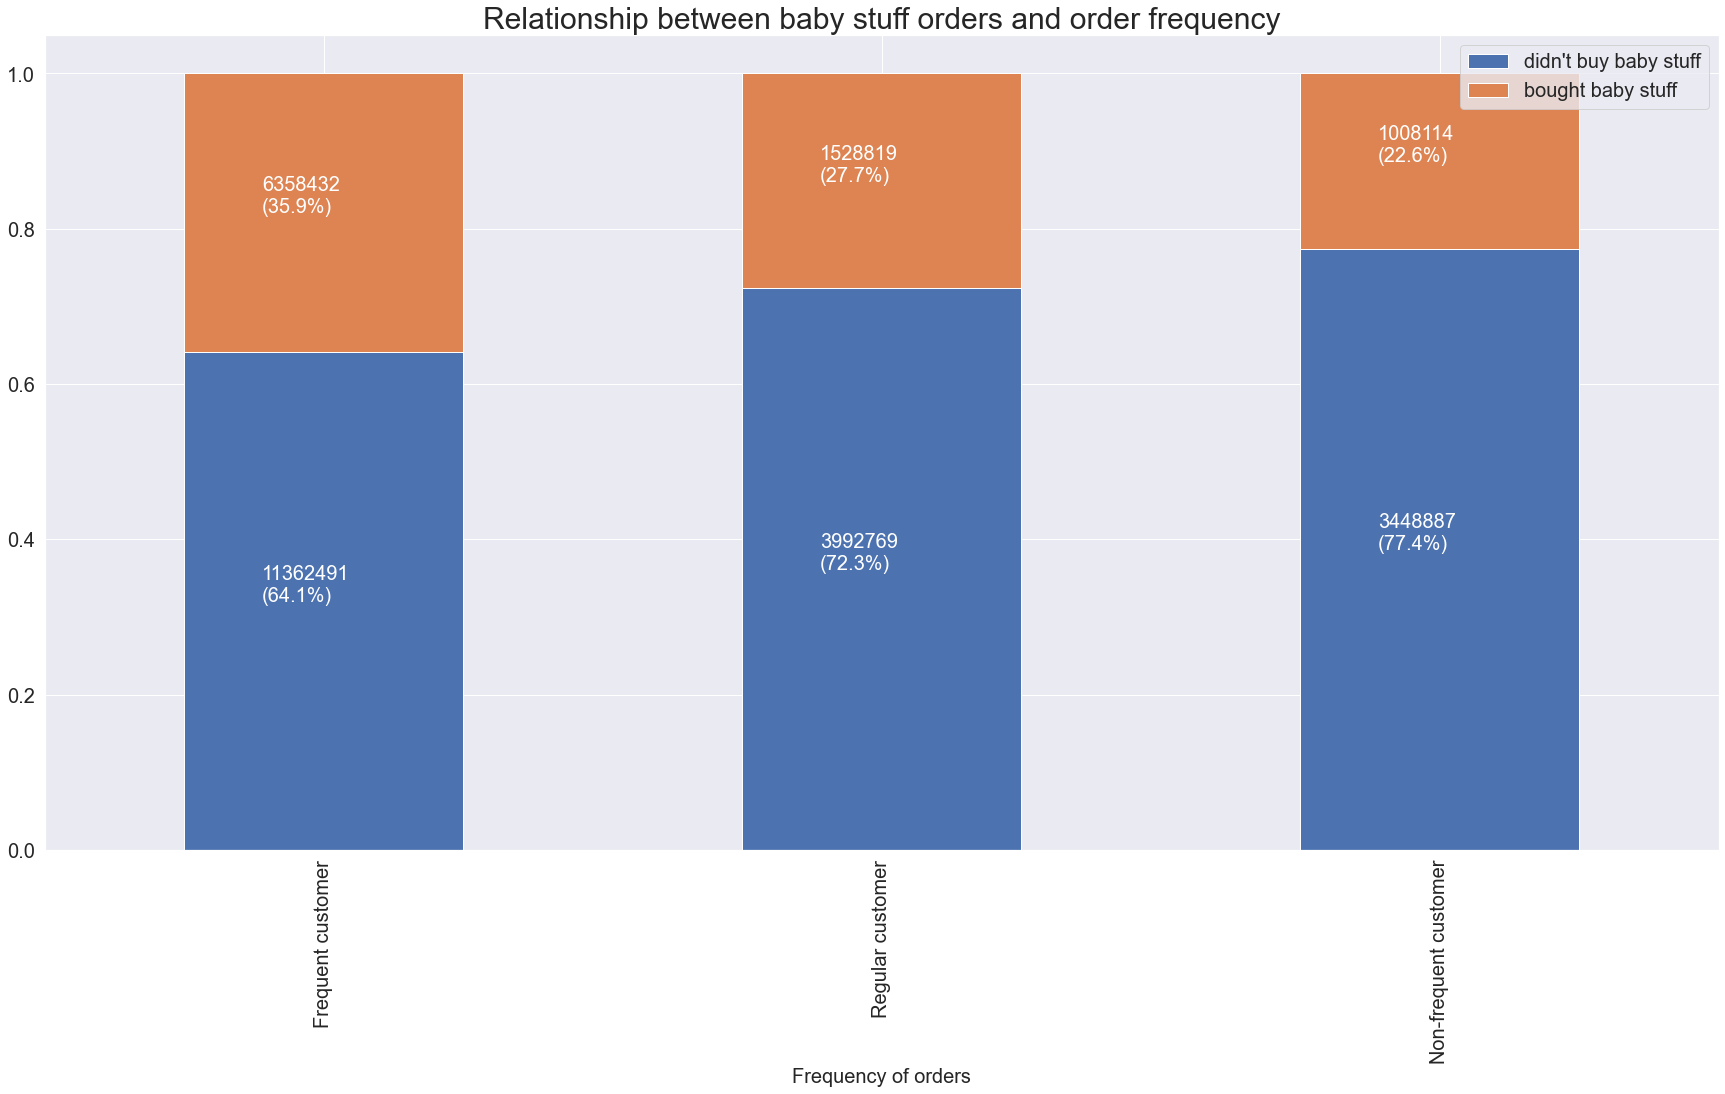

In [134]:
bar_8 = baby_frequency.plot.bar(stacked=True, fontsize=20)
plt.title('Relationship between baby stuff orders and order frequency', fontsize=30)
plt.xlabel('Frequency of orders', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*baby_frequency.index.values]):
    for (proportion, count, x_loc) in zip(baby_frequency.loc[y],
                                       baby_frequency_label.loc[y],
                                        baby_frequency.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

### Pet Profile

In [135]:
# crosstab of region and experiency of buying pet stuff

In [136]:
pet_region=pd.crosstab(index=df_merged['region'], columns=df_merged['pet_profile'], normalize='index')
pet_region=pet_region.reindex(['South', 'West','Midwest',  'Northeast'])
pet_region=pet_region.rename(columns={0:'didn\'t buy pet stuff', 1:'bought pet stuff'})
pet_region_labels=pd.crosstab(index=df_merged['region'], columns=df_merged['pet_profile'])
pet_region_labels=pet_region_labels.reindex(['South', 'West','Midwest',  'Northeast'])
pet_region_labels=pet_region_labels.rename(columns={0:'didn\'t buy pet stuff', 1:'bought pet stuff'})
pet_region_labels

pet_profile,didn't buy pet stuff,bought pet stuff
region,,
South,8696630,1050300
West,6634003,852106
Midwest,6078643,781212
Northeast,4611461,566583


In [137]:
# bar chart for region and experiency of buying pet stuff

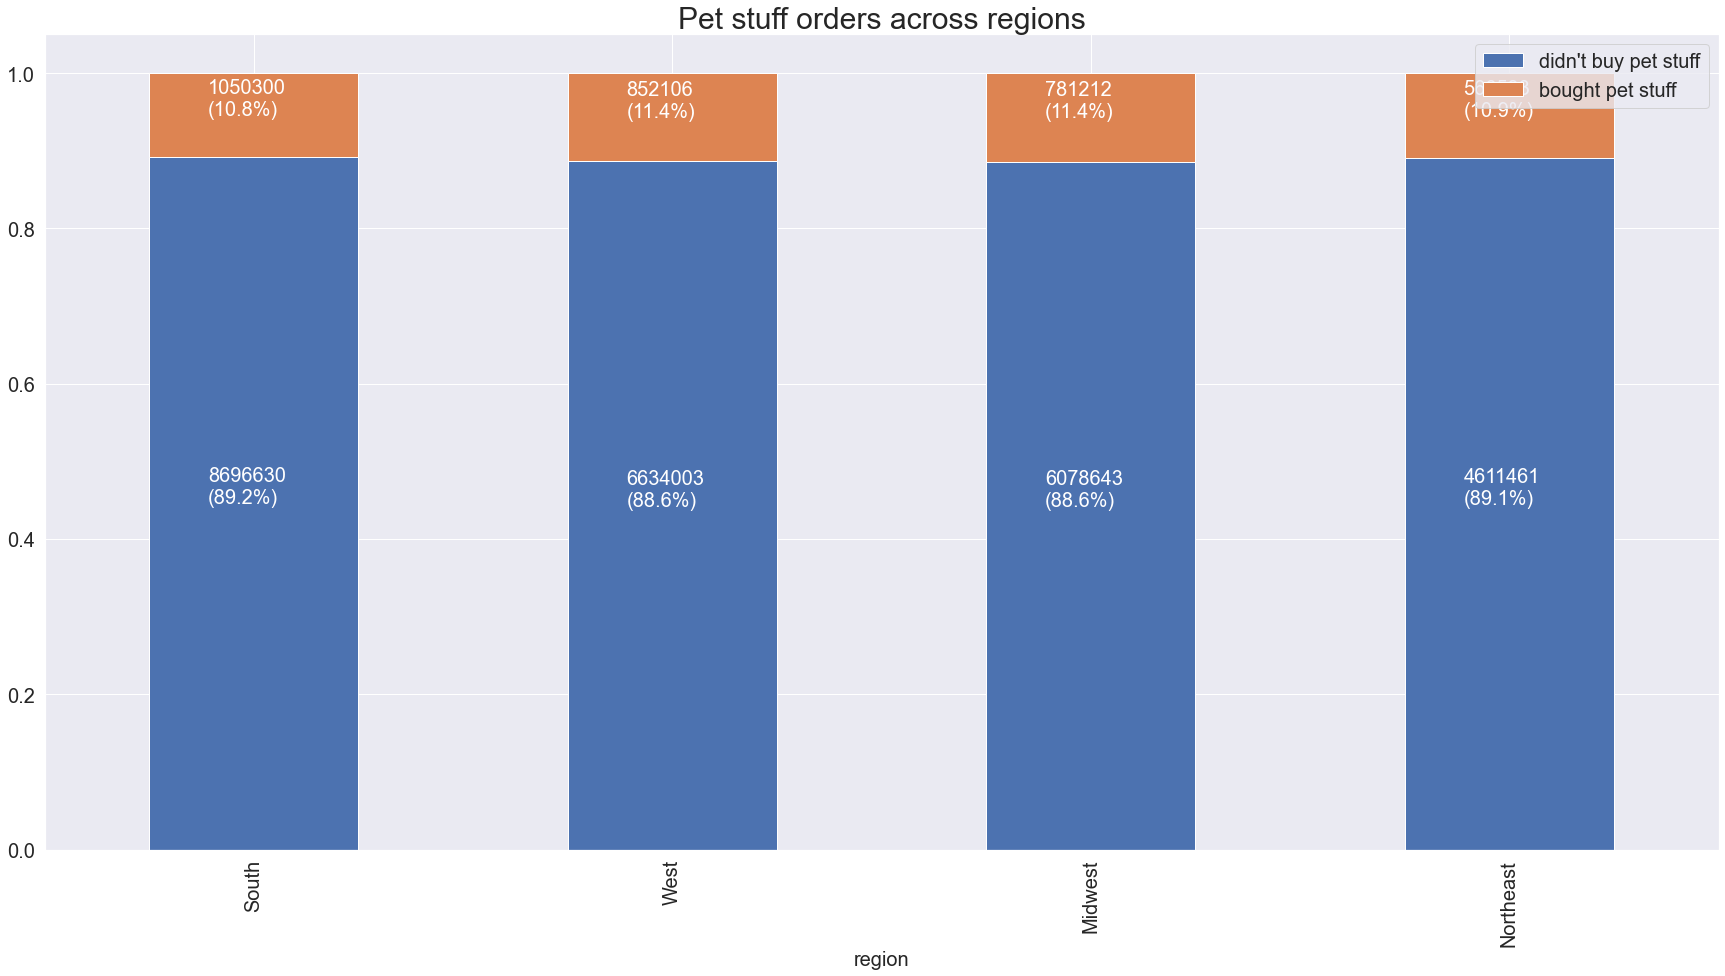

In [138]:
bar_9 = pet_region.plot.bar(stacked=True, fontsize=20)
plt.title('Pet stuff orders across regions', fontsize=30)
plt.xlabel('region', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*pet_region.index.values]):
    for (proportion, count, x_loc) in zip(pet_region.loc[y],
                                       pet_region_labels.loc[y],
                                        pet_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

# Additional

In [139]:
df_product_unique = df_merged.drop_duplicates(subset='product_name')

In [140]:
# pie chart for products by price range

<AxesSubplot:title={'center':'Composition of products by price ranges'}>

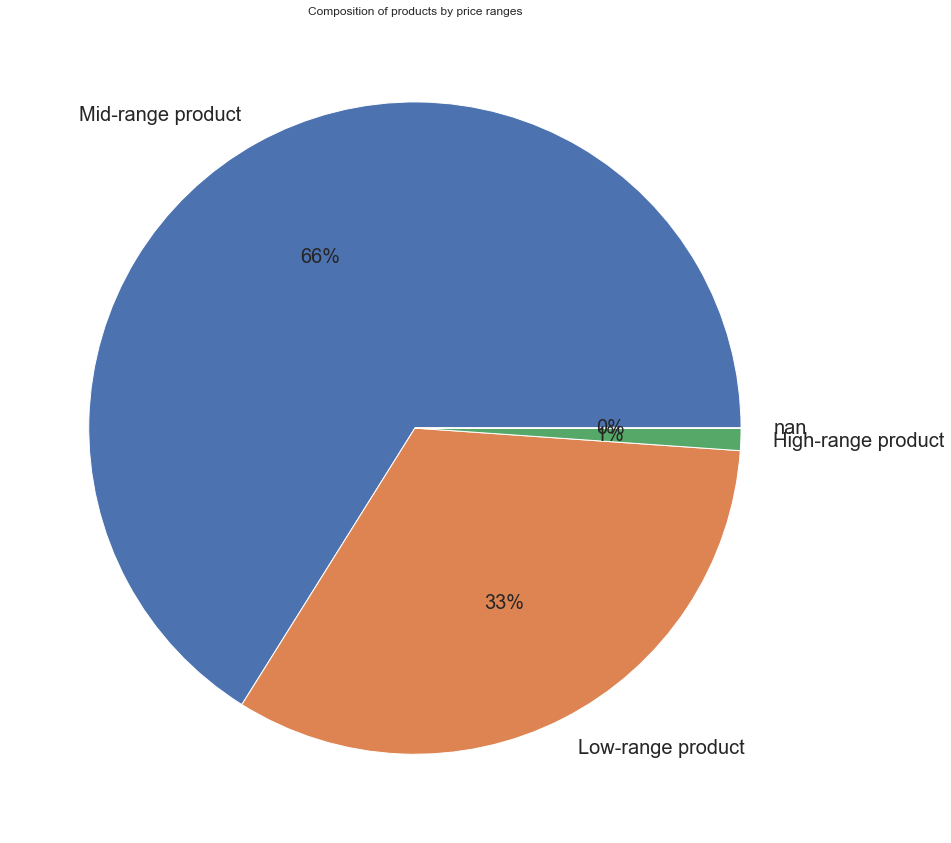

In [141]:
products = df_product_unique['price_range'].value_counts(dropna=False)
pie_6 = products.plot.pie(title = 'Composition of products by price ranges', label = '',autopct = ('%1.f%%'), textprops = {'fontsize': 20})
pie_6

In [142]:
# pie chart for orders by price range

<AxesSubplot:title={'center':'Composition of orders by product ranges'}>

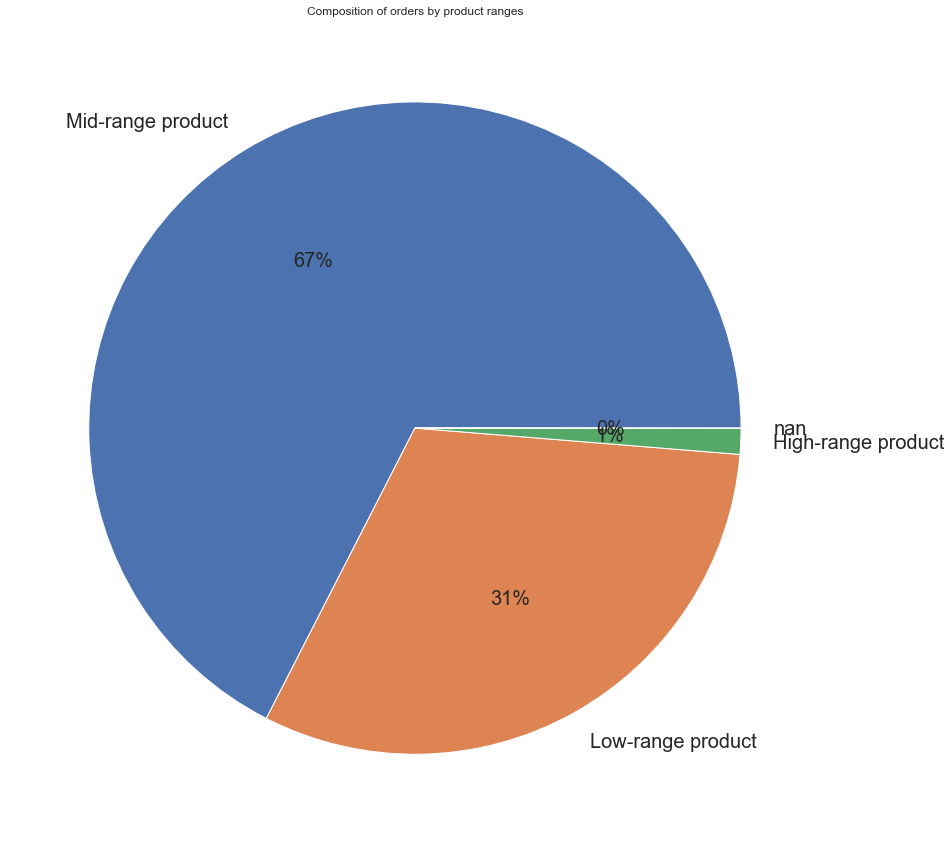

In [143]:
products_prices = df_merged['price_range'].value_counts(dropna = False)
pie_7 = products_prices.plot.pie(title = 'Composition of orders by product ranges', label='',autopct=('%1.f%%'), textprops={'fontsize': 20})
pie_7

In [144]:
# pie chart for orders by loyalty brands

<AxesSubplot:title={'center':'Composition of orders by loyalty brands'}>

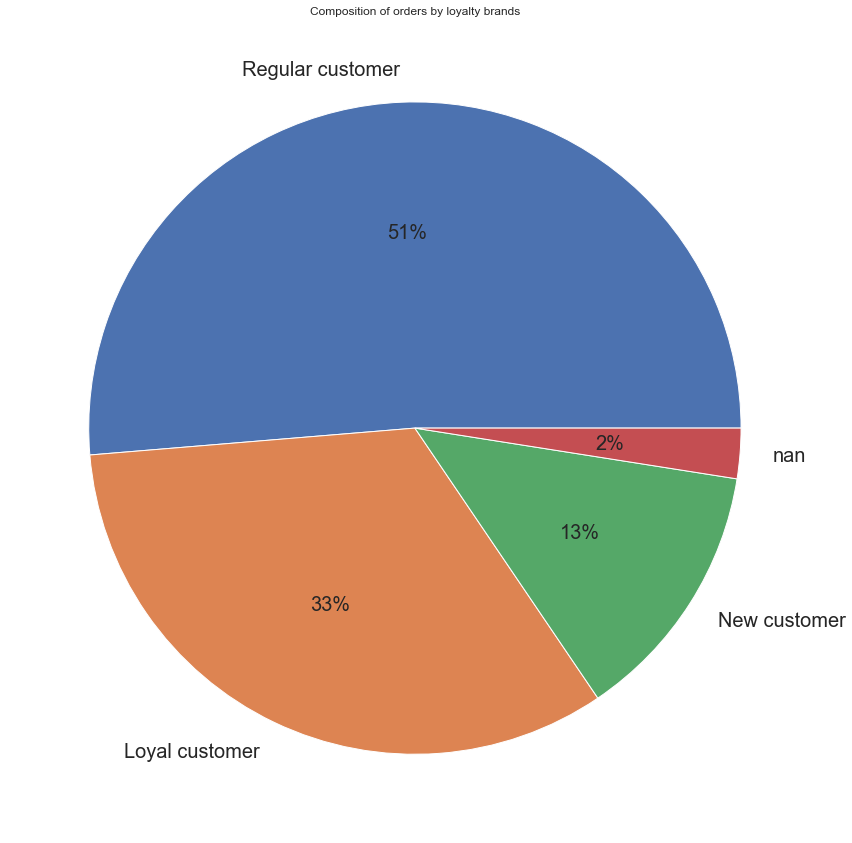

In [145]:
customers_loyalty_orders=df_merged['loyalty_flag'].value_counts(dropna=False)
pie_8=customers_loyalty_orders.plot.pie(title='Composition of orders by loyalty brands', label='',autopct=('%1.f%%'), textprops={'fontsize': 20})
pie_8

In [146]:
# aggregating the max, mean, and min variables on loyalty flag and price

In [147]:
df_merged.groupby(['loyalty_flag']).agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.775282  1.0  25.0
New customer      7.800237  1.0  25.0
Regular customer  7.798760  1.0  25.0

In [148]:
# aggregating the max, mean, and min variables on loyalty flag and median order

In [149]:
loyalty_order_frequency = df_merged.groupby(['loyalty_flag']).agg({'median_order':['mean', 'min', 'max']})
loyalty_order_frequency

median_order           
                         mean  min   max
loyalty_flag                            
Loyal customer       5.175954  0.0  14.0
New customer        18.351896  0.0  30.0
Regular customer    10.616838  0.0  30.0

In [150]:
# crosstab of loyalty flag and price range

In [151]:
df_loyalty_product_range=pd.crosstab(df_merged['price_range'], df_merged['loyalty_flag'], normalize='index')
df_loyalty_product_range=df_loyalty_product_range.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels=pd.crosstab(index=df_merged['price_range'], columns=df_merged['loyalty_flag'])
df_loyalty_product_range_labels=df_loyalty_product_range_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns')
df_loyalty_product_range_labels

loyalty_flag,New customer,Regular customer,Loyal customer
price_range,,,
High-range product,52092,198562,112186
Low-range product,1193453,4691533,3033130
Mid-range product,2568710,10127598,6560875


In [152]:
# bar chart for loyalty flag and price range

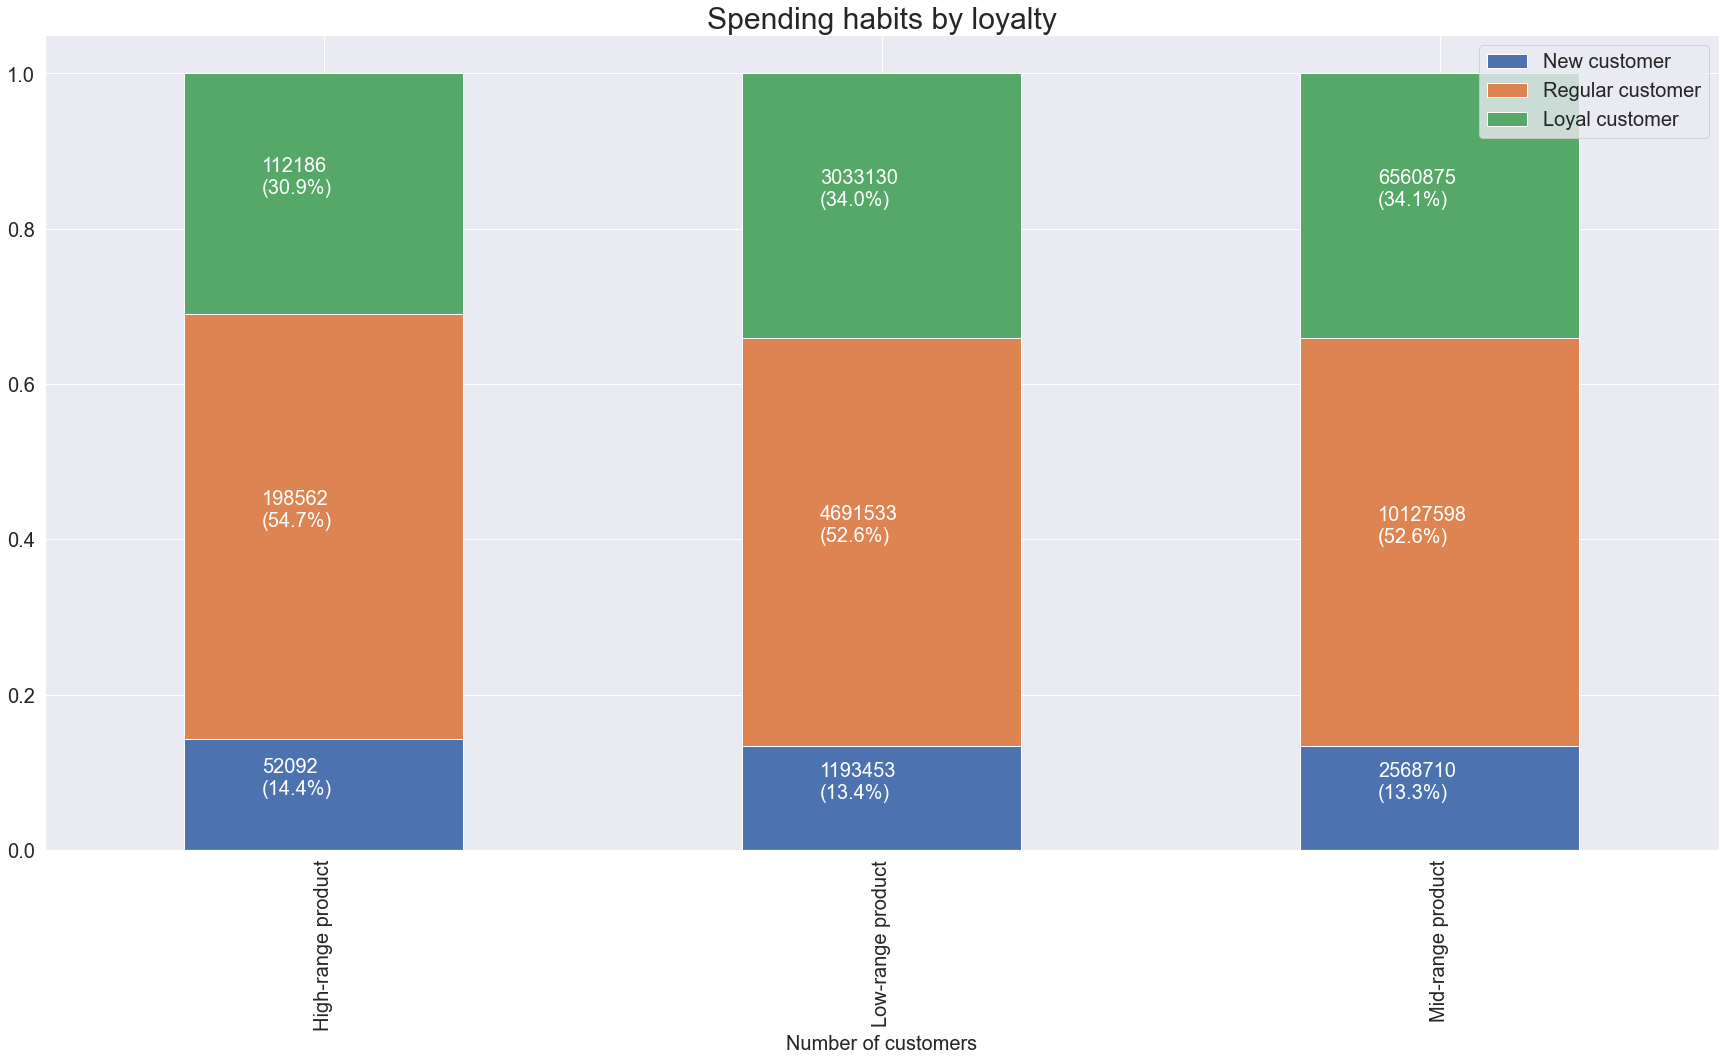

In [153]:
bar_11 = df_loyalty_product_range.plot.bar(stacked=True, fontsize=20)
plt.title('Spending habits by loyalty', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize = 20, loc = 'upper right')
for n, y in enumerate([*df_loyalty_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_loyalty_product_range.loc[y],
                                     df_loyalty_product_range_labels.loc[y],
                                        df_loyalty_product_range.loc[y].cumsum()):
                
        plt.text(y = (x_loc - proportion) + (proportion / 2),
                 x = n - 0.11,
                 s = f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color = "white",
                 fontsize=20)

In [154]:
# crosstab of loyalty flag and region

In [155]:
loyalty_region=pd.crosstab(df_merged['region'], df_merged['loyalty_flag'], normalize='index')
loyalty_region=loyalty_region.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels=pd.crosstab(index=df_merged['region'], columns=df_merged['loyalty_flag'])
loyalty_region_labels=loyalty_region_labels.reindex(['New customer', 'Regular customer', 'Loyal customer'], axis='columns').reindex(['South', 'West','Midwest',  'Northeast'])
loyalty_region_labels

loyalty_flag,New customer,Regular customer,Loyal customer
region,,,
South,1265481,5034944,3205498
West,980833,3810921,2510914
Midwest,897424,3549010,2237237
Northeast,671232,2625315,1753741


In [156]:
# bar chart for loyalty flag and region

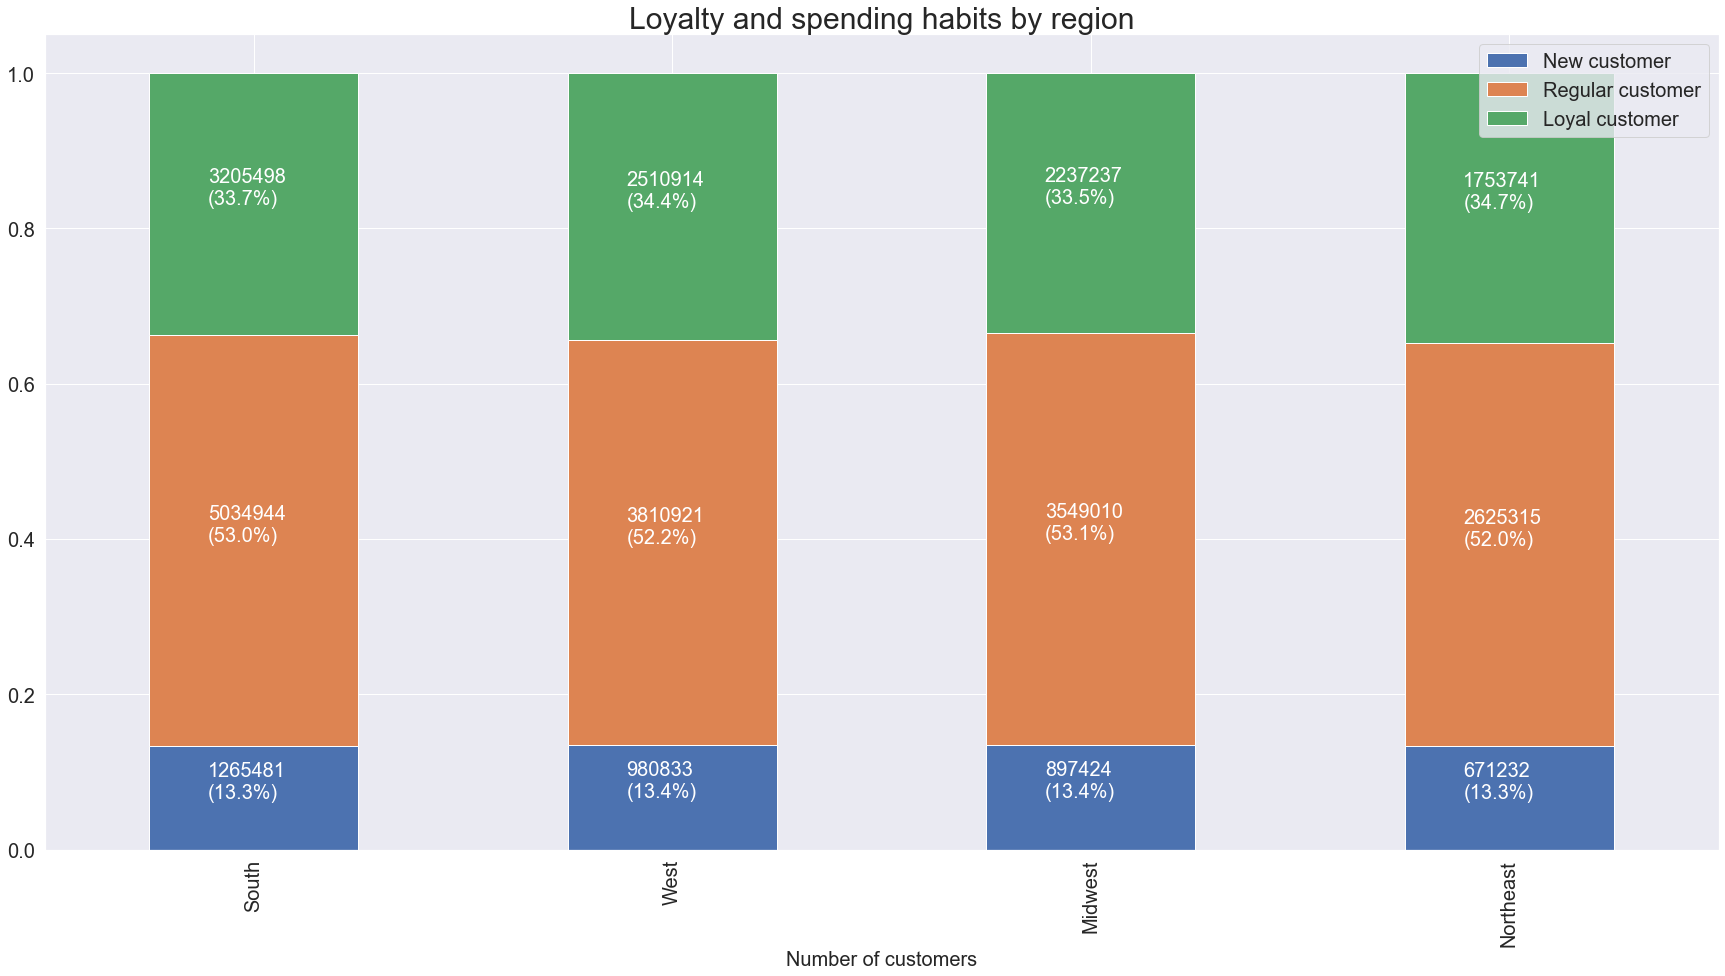

In [157]:
bar_12 = loyalty_region.plot.bar(stacked=True, fontsize=20)
plt.title('Loyalty and spending habits by region', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*pet_region.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                     loyalty_region_labels.loc[y],
                                        loyalty_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [158]:
# crosstab of price range and region

In [159]:
df_region_product_range=pd.crosstab(df_merged['region'], df_merged['price_range'], normalize='index')
df_region_product_range=df_region_product_range.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels=pd.crosstab(index=df_merged['region'], columns=df_merged['price_range'])
df_region_product_range_labels=df_region_product_range_labels.reindex(['Low-range product', 'Mid-range product', 'High-range product'], axis='columns').reindex(['South', 'West', 'Midwest', 'Northeast'])
df_region_product_range_labels

price_range,Low-range product,Mid-range product,High-range product
region,,,
South,3041560,6579759,124051
West,2339997,5049337,95714
Midwest,2140554,4631198,86944
Northeast,1622286,3489376,65618


In [160]:
# bar chart for price range and region

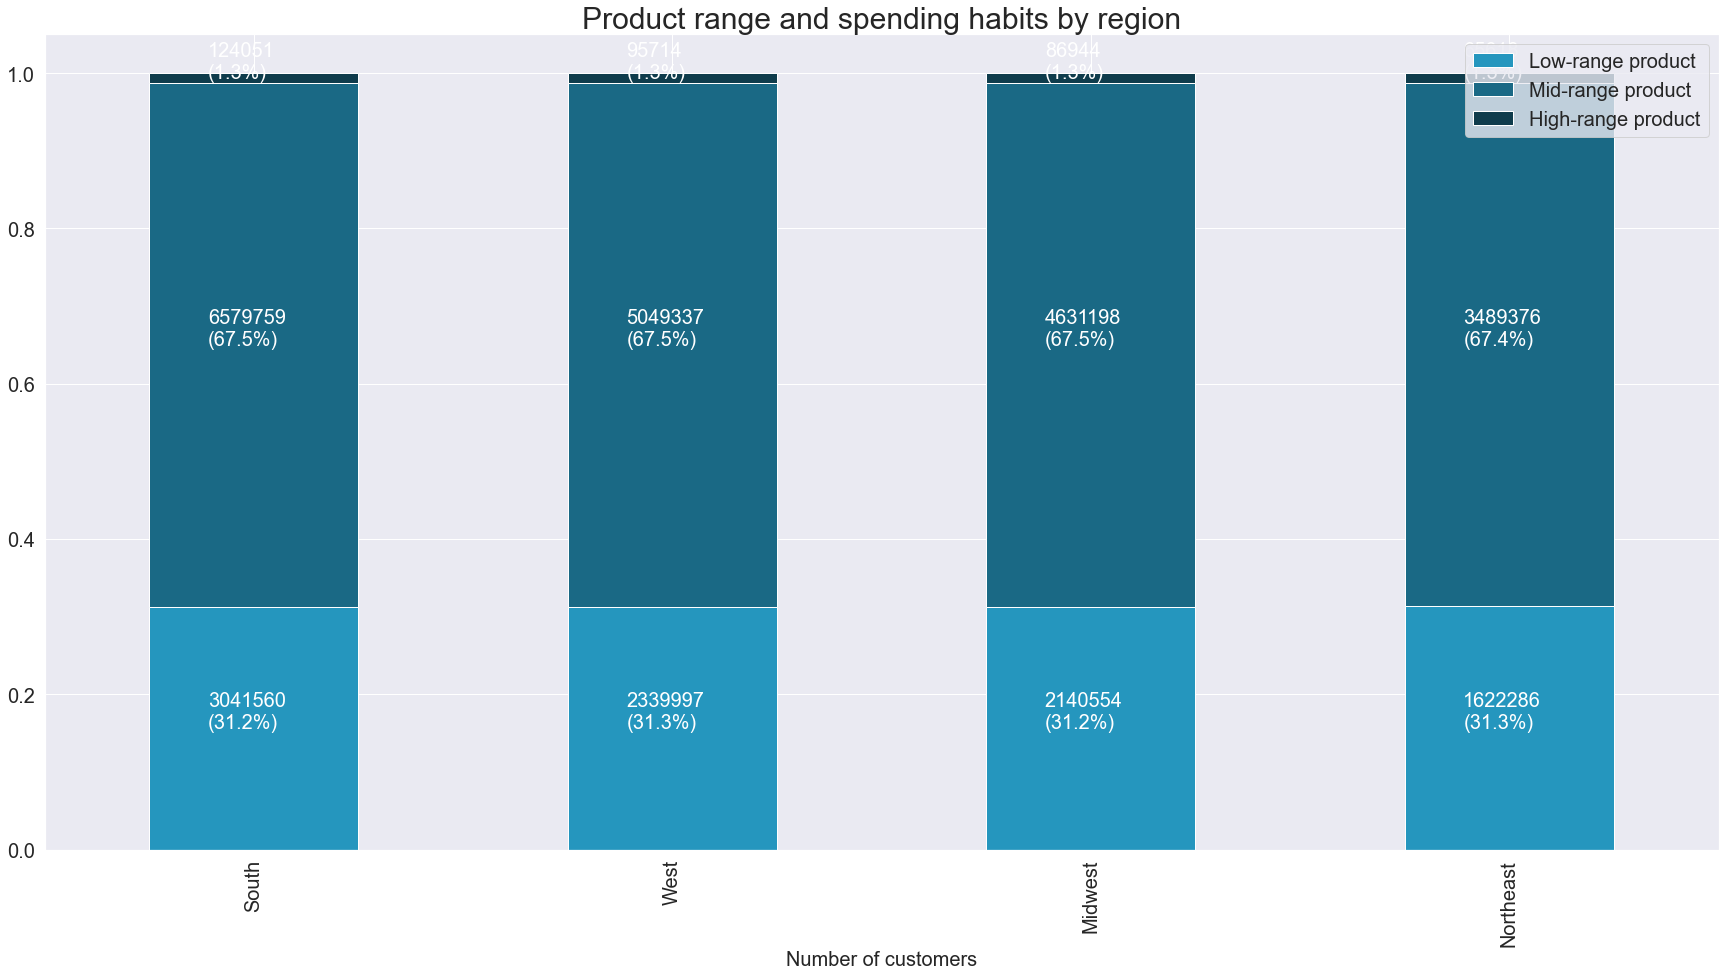

In [161]:
bar_13 = df_region_product_range.plot.bar(stacked=True,color=['#2596be', '#1a6985','#0f3c4c'], fontsize=20) 
plt.title('Product range and spending habits by region', fontsize=30)
plt.xlabel('Number of customers', fontsize=20)
plt.legend(fontsize=20, loc='upper right')
for n, y in enumerate([*df_region_product_range.index.values]):
    for (proportion, count, x_loc) in zip(df_region_product_range.loc[y],
                                     df_region_product_range_labels.loc[y],
                                        df_region_product_range.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="white",
                 fontsize=20)

In [162]:
day_week=df_merged['order_date_of_week'].value_counts().rename_axis('day_of_week').to_frame(name='counts')
day_week=day_week.rename({0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
day_week=day_week.reindex(['Saturday', 'Sunday', 'Monday','Tuesday', 'Wednesday', 'Thursday', 'Friday'])

In [163]:
# bar chart for days and number of orders

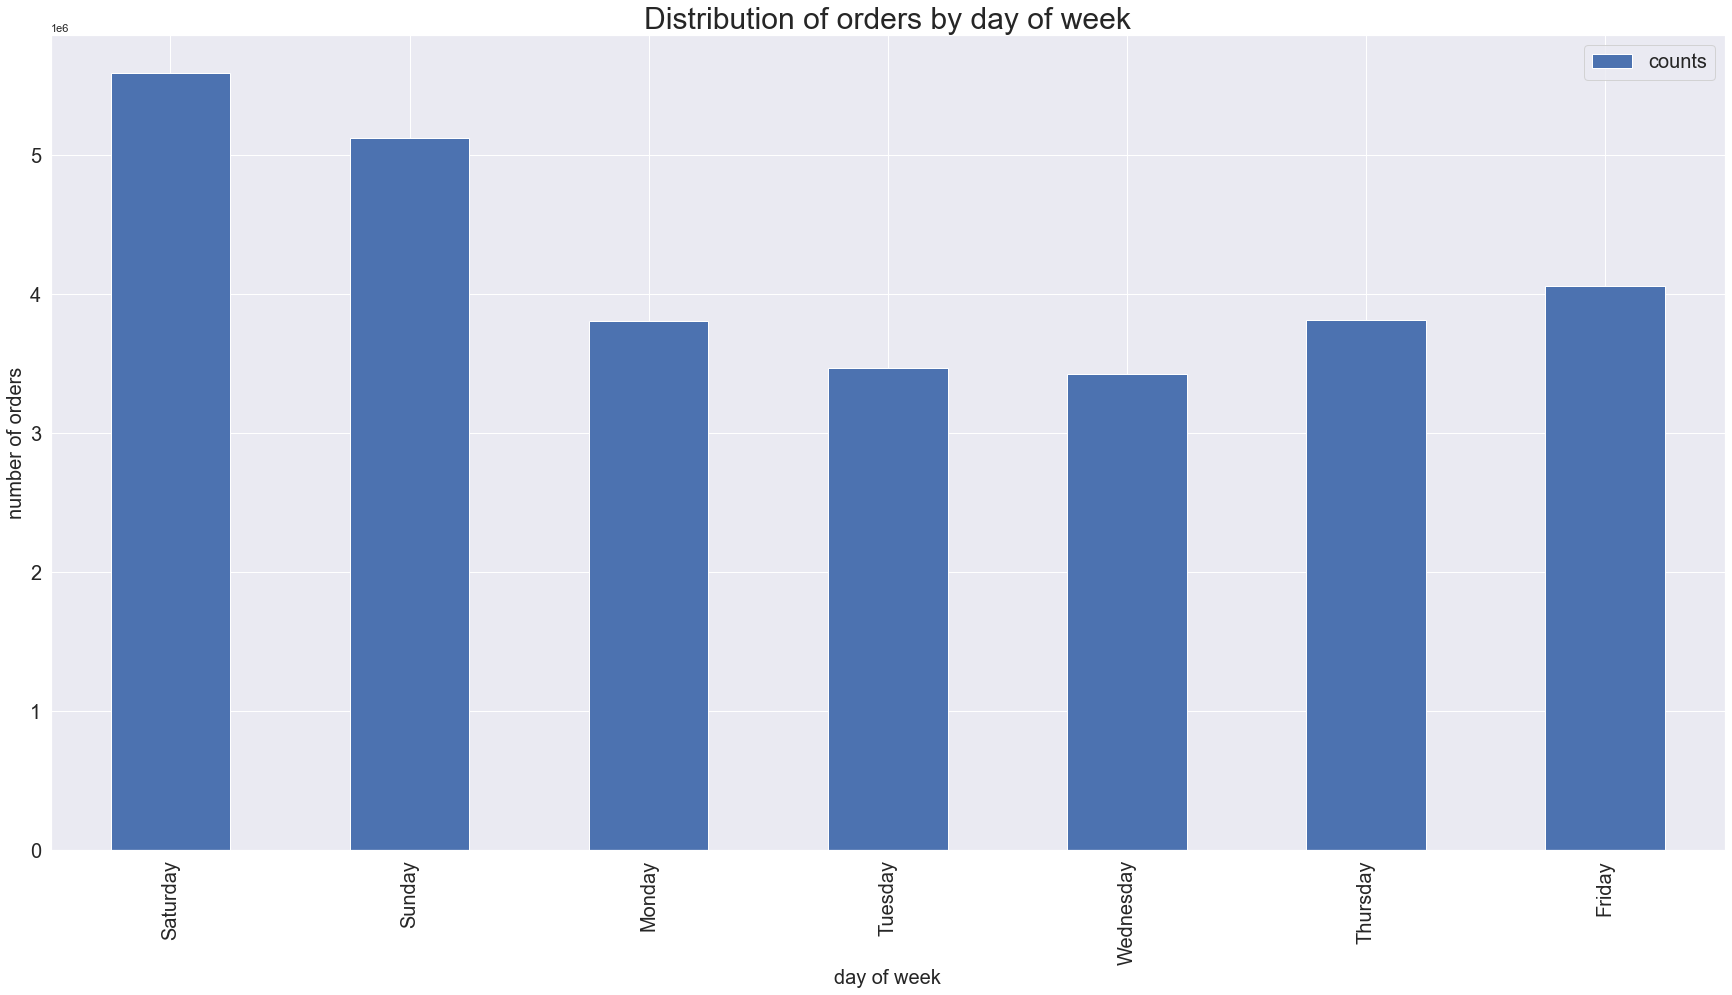

In [164]:
bar_14=day_week.plot.bar(fontsize=20)
plt.title('Distribution of orders by day of week', fontsize=30)
plt.xlabel('day of week', fontsize=20)
plt.ylabel('number of orders', fontsize=20)
plt.legend(fontsize=20)

In [165]:
np.random.seed(4)
dev=np.random.rand(len(df_merged))<=0.7
big=df_merged[dev]
small=df_merged[~dev]

In [166]:
# line chart for hours and average price of orders

Text(0, 0.5, 'average price of orders')

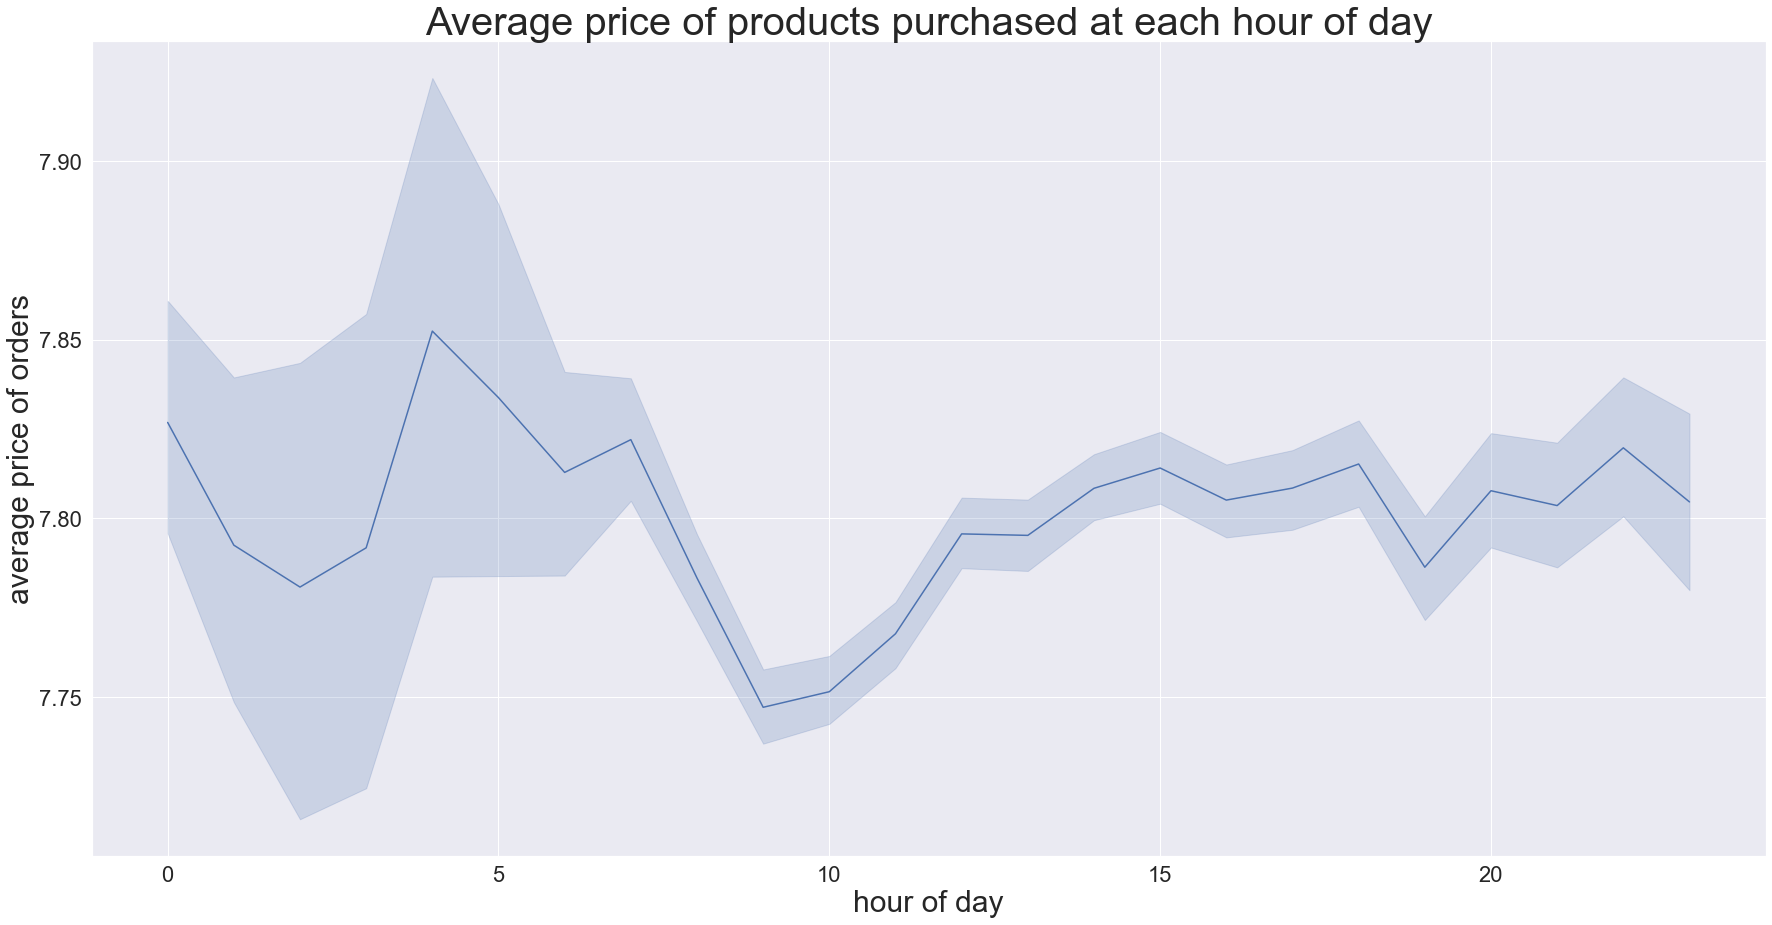

In [167]:
sns.set(font_scale = 2)
line_order_price_hour=sns.lineplot( data=small, x='order_hour_of_day', y='prices', palette='#1a6985')
line_order_price_hour.axes.set_title("Average price of products purchased at each hour of day",fontsize=40)
line_order_price_hour.set_xlabel("hour of day",fontsize=30)
line_order_price_hour.set_ylabel("average price of orders",fontsize=30)

# Exporting visualization

In [168]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_age_distribution.png'))
bar_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_dependant_age_group.png'))
bar_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_age_region.png'))
bar_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_department.png'))
bar_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_age_consumption.png'))
bar_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_income_region.png'))
bar_7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_dependant_order_frequency.png'))
bar_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_baby_experiency.png'))
bar_9.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_pet_experiency.png'))
bar_10.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_income_price_rage.png'))
bar_11.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_spending_habit_loyalty.png'))
bar_12.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_spending_habit_loyalty_region.png'))
bar_13.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_product_range_spending_habit_region.png'))
bar_14.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'bar_order_day_week.png'))

In [169]:
hist_1.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'hist_income_distribution.png'))

In [170]:
pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_baby_experiency.png'))
pie_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_pet_experiency.png'))
pie_3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_income_loyal.png'))
pie_4.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_income_regular.png'))
pie_5.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_income_new.png'))
pie_6.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_product_price_range.png'))
pie_7.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_order_price_range.png'))
pie_8.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'pie_order_loyalty_brand.png'))

In [171]:
line_age_order_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'line_age_order_hour.png'))
line_age_order_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'line_age_order_day.png'))
line_order_price_hour.figure.savefig(os.path.join(path, '04 Analysis', 'Visualization', 'line_order_price_hour.png'))